# Setup and Configuration

In [1]:
# initial setup

!pip install openpyxl
!pip install pandas plotnine
from plotnine import *
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# output display configuration

pd.set_option('display.max_columns', 25)
pd.set_option('display.max_rows', 25)
pd.set_option('display.width', 80)

In [2]:
# read Excel file

xlsx = pd.ExcelFile('data/UN_MigrantStockTotal_2015.xlsx')

In [3]:
# define read table function

def read_table(sheet, skip=14, header=[0, 1], index_col=None):
    """reade table from Excel, skip the first 14 rows, use first two rows as header, use first column as row index"""
    return pd.read_excel(xlsx, skiprows=skip, sheet_name=sheet, header=header, index_col=index_col, na_values=['..'], keep_default_na=False)

# Tidying Up

## Table 1

In [4]:
# read table 1

table1 = read_table('Table 1', 14)
table1

Sort\norder Major area, region, country or area of destination  \
    Unnamed: 0_level_1                                 Unnamed: 1_level_1   
0                    1                                              WORLD   
1                    2                                  Developed regions   
2                    3                                 Developing regions   
3                    4                          Least developed countries   
4                    5  Less developed regions excluding least develop...   
..                 ...                                                ...   
260                261                                              Samoa   
261                262                                            Tokelau   
262                263                                              Tonga   
263                264                                             Tuvalu   
264                265                          Wallis and Futuna Islands   

                 Notes       Country code   Type of data (a)  \
    Unnamed: 2_level_1 Unnamed: 3_level_1 Unnamed: 4_level_1   
0                                     900                      
1                  (b)                901                      
2                  (c)                902                      
3                  (d)                941                      
4                                     934                      
..                 ...                ...                ...   
260                                   882                  B   
261                                   772                  B   
262                                   776                  B   
263                                   798                  C   
264                                   876                  B   

    International migrant stock at mid-year (both sexes)               \
                                                    1990         1995   
0                                          152563212.0    160801752.0   
1                                           82378628.0     92306854.0   
2                                           70184584.0     68494898.0   
3                                           11075966.0     11711703.0   
4                                           59105261.0     56778501.0   
..                                                 ...            ...   
260                                             3357.0         4694.0   
261                                              270.0          266.0   
262                                             2911.0         3274.0   
263                                              318.0          263.0   
264                                             1402.0         1680.0   

                                                     \
            2000         2005       2010       2015   
0    172703309.0  191269100.0  221714243  243700236   
1    103375363.0  117181109.0  132560325  140481955   
2     69327946.0   74087991.0   89153918  103218281   
3     10077824.0    9809634.0   10018128   11951316   
4     59244124.0   64272611.0   79130668   91262036   
..           ...          ...        ...        ...   
260       5998.0       5746.0       5122       4929   
261        262.0        258.0        429        487   
262       3684.0       4301.0       5022       5731   
263        217.0        183.0        154        141   
264       2015.0       2365.0       2776       2849   

    International migrant stock at mid-year (male)                          \
                                              1990        1995        2000   
0                                       77747510.0  81737477.0  87884839.0   
1                                       40263397.0  45092799.0  50536796.0   
2                                       37484113.0  36644678.0  37348043.0   
3                                        5843107.0   6142712.0   5361902.0   
4                                       31

In [5]:
# rename header for easy manipulation

table1 = table1.rename(columns=lambda x: x if not 'Unnamed' in str(x) else '')
table1.rename(columns={'Major area, region, country or area of destination':'Destination',
                       'International migrant stock at mid-year (both sexes)':'Both sexes',
                       'International migrant stock at mid-year (male)':'Male',
                       'International migrant stock at mid-year (female)':'Female'},
              inplace=True)
table1

Sort\norder                                        Destination Notes  \
                                                                           
0             1                                              WORLD         
1             2                                  Developed regions   (b)   
2             3                                 Developing regions   (c)   
3             4                          Least developed countries   (d)   
4             5  Less developed regions excluding least develop...         
..          ...                                                ...   ...   
260         261                                              Samoa         
261         262                                            Tokelau         
262         263                                              Tonga         
263         264                                             Tuvalu         
264         265                          Wallis and Futuna Islands         

    Country code Type of data (a)   Both sexes                            \
                                          1990         1995         2000   
0            900                   152563212.0  160801752.0  172703309.0   
1            901                    82378628.0   92306854.0  103375363.0   
2            902                    70184584.0   68494898.0   69327946.0   
3            941                    11075966.0   11711703.0   10077824.0   
4            934                    59105261.0   56778501.0   59244124.0   
..           ...              ...          ...          ...          ...   
260          882                B       3357.0       4694.0       5998.0   
261          772                B        270.0        266.0        262.0   
262          776                B       2911.0       3274.0       3684.0   
263          798                C        318.0        263.0        217.0   
264          876                B       1402.0       1680.0       2015.0   

                                              Male                          \
            2005       2010       2015        1990        1995        2000   
0    191269100.0  221714243  243700236  77747510.0  81737477.0  87884839.0   
1    117181109.0  132560325  140481955  40263397.0  45092799.0  50536796.0   
2     74087991.0   89153918  103218281  37484113.0  36644678.0  37348043.0   
3      9809634.0   10018128   11951316   5843107.0   6142712.0   5361902.0   
4     64272611.0   79130668   91262036  31641006.0  30501966.0  31986141.0   
..           ...        ...        ...         ...         ...         ...   
260       5746.0       5122       4929      1771.0      2451.0      3101.0   
261        258.0        429        487       150.0       147.0       144.0   
262       4301.0       5022       5731      1488.0      1718.0      1981.0   
263        183.0        154        141       180.0       148.0       121.0   
264       2365.0       2776       2849       726.0       859.0      1018.0   

                                           Female                          \
           2005       2010       2015        1990        1995        2000   
0    97866674.0  114613714  126115435  74815702.0  79064275.0  84818470.0   
1    57217777.0   64081077   67618619  42115231.0  47214055.0  52838567.0   
2    40648897.0   50532637   58496816  32700471.0  31850220.0  31979903.0   
3     5383009.0    5462714    6463217   5236216.0   5573685.0   4721920.0   
4    35265888.0   45069923   52033599  27464255.0  26276535.0  27257983.0   
..          ...        ...        ...         ...         ...         ...   
260      2940.0       2594       2469      1586.0      2243.0      2897.0   
261       133.0        206        233       120.0       119.0       118.0   
262      2328.0       2727       3127      1423.0      1556.0      1703.0   
263       101.0         85         78       138.0       115.0        96.0   
264      1194.0       1401       1438       676.0       821.0       997.0   

         

In [6]:
# delete redundant columns that are irrelevant to the analysis

table1.drop(['Sort\norder',
             'Notes',
             'Type of data (a)'],
            axis=1, level=0, inplace=True)
table1

Destination Country code  \
                                                                      
0                                                WORLD          900   
1                                    Developed regions          901   
2                                   Developing regions          902   
3                            Least developed countries          941   
4    Less developed regions excluding least develop...          934   
..                                                 ...          ...   
260                                              Samoa          882   
261                                            Tokelau          772   
262                                              Tonga          776   
263                                             Tuvalu          798   
264                          Wallis and Futuna Islands          876   

      Both sexes                                                               \
            1990         1995         2000         2005       2010       2015   
0    152563212.0  160801752.0  172703309.0  191269100.0  221714243  243700236   
1     82378628.0   92306854.0  103375363.0  117181109.0  132560325  140481955   
2     70184584.0   68494898.0   69327946.0   74087991.0   89153918  103218281   
3     11075966.0   11711703.0   10077824.0    9809634.0   10018128   11951316   
4     59105261.0   56778501.0   59244124.0   64272611.0   79130668   91262036   
..           ...          ...          ...          ...        ...        ...   
260       3357.0       4694.0       5998.0       5746.0       5122       4929   
261        270.0        266.0        262.0        258.0        429        487   
262       2911.0       3274.0       3684.0       4301.0       5022       5731   
263        318.0        263.0        217.0        183.0        154        141   
264       1402.0       1680.0       2015.0       2365.0       2776       2849   

           Male                                                            \
           1990        1995        2000        2005       2010       2015   
0    77747510.0  81737477.0  87884839.0  97866674.0  114613714  126115435   
1    40263397.0  45092799.0  50536796.0  57217777.0   64081077   67618619   
2    37484113.0  36644678.0  37348043.0  40648897.0   50532637   58496816   
3     5843107.0   6142712.0   5361902.0   5383009.0    5462714    6463217   
4    31641006.0  30501966.0  31986141.0  35265888.0   45069923   52033599   
..          ...         ...         ...         ...        ...        ...   
260      1771.0      2451.0      3101.0      2940.0       2594       2469   
261       150.0       147.0       144.0       133.0        206        233   
262      1488.0      1718.0      1981.0      2328.0       2727       3127   
263       180.0       148.0       121.0       101.0         85         78   
264       726.0       859.0      1018.0      1194.0       1401       1438   

         Female                                                            
           1990        1995        2000        2005       2010       2015  
0    74815702.0  79064275.0  84818470.0  93402426.0  107100529  117584801  
1    42115231.0  47214055.0  52838567.0  59963332.0   68479248   72863336  
2    32700471.0  31850220.0  31979903.0  33439094.0   38621281   44721465  
3     5236216.0   5573685.0   4721920.0   4432371.0    4560536    5493028  
4    27464255.0  26276535.0  27257983.0  29006723.0   34060745   39228437  
..          ...         ...         ...         ...        ...        ...  
260      1586.0      2243.0      2897.0      2806.0       2528       2460  
261       120.0       119.0       118.0       125.0        223        254  
262      1423.0      1556.0      1703.0      1973.0       2295       2604  
263       138.0       115.0        96.0        82.0         69         63  
264       676.0       821.0       997.0      1171.0       1375       1411  

[265 rows x 20 columns]

In [7]:
# remove continent and region subtotals because they are fake observations

# fake_observation = table1[table1['Country code']>=900]
# table1.drop(fake_observation.index, inplace=True)
# table1

In [8]:
# convert table into long format
# express the observation values in thousands

table1_melt = table1.melt(id_vars=['Country code', 'Destination'],
                          var_name=['Gender', 'Year'],
                          value_name='International migrant stock at mid-year')
table1_melt['International migrant stock at mid-year'] = table1_melt['International migrant stock at mid-year'] / 1000
table1_melt

Country code                                        Destination  \
0              900                                              WORLD   
1              901                                  Developed regions   
2              902                                 Developing regions   
3              941                          Least developed countries   
4              934  Less developed regions excluding least develop...   
...            ...                                                ...   
4765           882                                              Samoa   
4766           772                                            Tokelau   
4767           776                                              Tonga   
4768           798                                             Tuvalu   
4769           876                          Wallis and Futuna Islands   

          Gender  Year  International migrant stock at mid-year  
0     Both sexes  1990                               152563.212  
1     Both sexes  1990                                82378.628  
2     Both sexes  1990                                70184.584  
3     Both sexes  1990                                11075.966  
4     Both sexes  1990                                59105.261  
...          ...   ...                                      ...  
4765      Female  2015                                    2.460  
4766      Female  2015                                    0.254  
4767      Female  2015                                    2.604  
4768      Female  2015                                    0.063  
4769      Female  2015                                    1.411  

[4770 rows x 5 columns]

In [9]:
# split the table into a subset consisting observations for female and male for easy manipulation
# remove continent and region subtotals because they are fake observations

table1_mf = table1_melt.loc[~(table1_melt['Gender']=='Both sexes')].sort_values(['Country code', 'Destination', 'Gender'])
fake_observation = table1_mf[table1_mf['Country code']>=900]
table1_mf.drop(fake_observation.index, inplace=True)
table1_mf

Country code  Destination  Gender  Year  \
3278             4  Afghanistan  Female  1990   
3543             4  Afghanistan  Female  1995   
3808             4  Afghanistan  Female  2000   
4073             4  Afghanistan  Female  2005   
4338             4  Afghanistan  Female  2010   
...            ...          ...     ...   ...   
1881           894       Zambia    Male  1995   
2146           894       Zambia    Male  2000   
2411           894       Zambia    Male  2005   
2676           894       Zambia    Male  2010   
2941           894       Zambia    Male  2015   

      International migrant stock at mid-year  
3278                                   25.128  
3543                                   32.417  
3808                                   33.069  
4073                                   38.026  
4338                                   44.537  
...                                       ...  
1881                                  125.329  
2146                                  163.620  
2411                                  128.553  
2676                                   75.775  
2941                                   64.512  

[2784 rows x 5 columns]

In [10]:
# split the table into a subset consisting observations for both sexes for easy manipulation
# remove continent and region subtotals because they are fake observations

table1_total = table1_melt.loc[(table1_melt['Gender']=='Both sexes')].drop(['Gender'], axis=1).sort_values(['Country code', 'Destination', 'Year'])
fake_observation = table1_total[table1_total['Country code']>=900]
table1_total.drop(fake_observation.index, inplace=True)
table1_total

Country code  Destination  Year  International migrant stock at mid-year
98               4  Afghanistan  1990                                   57.686
363              4  Afghanistan  1995                                   71.522
628              4  Afghanistan  2000                                   75.917
893              4  Afghanistan  2005                                   87.300
1158             4  Afghanistan  2010                                  102.246
...            ...          ...   ...                                      ...
291            894       Zambia  1995                                  244.338
556            894       Zambia  2000                                  321.167
821            894       Zambia  2005                                  252.749
1086           894       Zambia  2010                                  149.637
1351           894       Zambia  2015                                  127.915

[1392 rows x 4 columns]

In [11]:
# split the table into a subset consisting observations for region subtotals

region = (901, 902)
table1_region = table1_melt.loc[(table1_melt['Gender']=='Both sexes') & (table1_melt['Country code'].isin(region))].drop(['Gender'], axis=1).sort_values(['Country code', 'Destination', 'Year'])
table1_region

Country code         Destination  Year  \
1              901   Developed regions  1990   
266            901   Developed regions  1995   
531            901   Developed regions  2000   
796            901   Developed regions  2005   
1061           901   Developed regions  2010   
1326           901   Developed regions  2015   
2              902  Developing regions  1990   
267            902  Developing regions  1995   
532            902  Developing regions  2000   
797            902  Developing regions  2005   
1062           902  Developing regions  2010   
1327           902  Developing regions  2015   

      International migrant stock at mid-year  
1                                   82378.628  
266                                 92306.854  
531                                103375.363  
796                                117181.109  
1061                               132560.325  
1326                               140481.955  
2                                   70184.584  
267                                 68494.898  
532                                 69327.946  
797                                 74087.991  
1062                                89153.918  
1327                               103218.281

In [12]:
# split the table into a subset consisting observations for continent subtotals

continent = (903, 904, 905, 908, 909, 935)
table1_continent = table1_melt.loc[(table1_melt['Gender']=='Both sexes') & (table1_melt['Country code'].isin(continent))].drop(['Gender'], axis=1).sort_values(['Country code', 'Destination', 'Year'])
table1_continent

Country code Destination  Year  International migrant stock at mid-year
6              903      Africa  1990                                15690.623
271            903      Africa  1995                                16352.814
536            903      Africa  2000                                14800.306
801            903      Africa  2005                                15191.146
1066           903      Africa  2010                                16840.014
...            ...         ...   ...                                      ...
335            935        Asia  1995                                46548.225
600            935        Asia  2000                                49340.815
865            935        Asia  2005                                53371.224
1130           935        Asia  2010                                65914.319
1395           935        Asia  2015                                75081.125

[36 rows x 4 columns]

## Table 2

In [13]:
# read table 2

table2 = read_table('Table 2', 14)
table2

Sort\norder Major area, region, country or area of destination  \
    Unnamed: 0_level_1                                 Unnamed: 1_level_1   
0                    1                                              WORLD   
1                    2                                  Developed regions   
2                    3                                 Developing regions   
3                    4                          Least developed countries   
4                    5  Less developed regions excluding least develop...   
..                 ...                                                ...   
260                261                                              Samoa   
261                262                                            Tokelau   
262                263                                              Tonga   
263                264                                             Tuvalu   
264                265                          Wallis and Futuna Islands   

                 Notes       Country code  \
    Unnamed: 2_level_1 Unnamed: 3_level_1   
0                                     900   
1                  (b)                901   
2                  (c)                902   
3                  (d)                941   
4                                     934   
..                 ...                ...   
260                                   882   
261                                   772   
262                                   776   
263                                   798   
264                                   876   

    Total population of both sexes at mid-year (thousands)               \
                                                      1990         1995   
0                                          5309667.699      5735123.084   
1                                          1144463.062      1169761.211   
2                                          4165204.637      4565361.873   
3                                           510057.629       585189.354   
4                                          3655147.008      3980172.519   
..                                                 ...              ...   
260                                            162.865          170.158   
261                                              1.609            1.520   
262                                             95.152           95.889   
263                                              9.004            9.227   
264                                             13.880           14.143   

                                                         \
            2000         2005         2010         2015   
0    6126622.121  6519635.850  6929725.043  7349472.099   
1    1188811.731  1208919.509  1233375.711  1251351.086   
2    4937810.390  5310716.341  5696349.332  6098121.013   
3     664386.087   752804.951   847254.847   954157.804   
4    4273424.303  4557911.390  4849094.485  5143963.209   
..           ...          ...          ...          ...   
260      174.614      179.928      186.029      193.228   
261        1.552        1.210        1.135        1.250   
262       97.898      100.858      103.947      106.170   
263        9.419        9.694        9.827        9.916   
264       14.497       14.246       13.565       13.151   

    Total male population at mid-year (thousands)                            \
                                             1990         1995         2000   
0                                     2670423.701  2886635.893  3084537.662   
1                                      555255.626   568268.456   578010.218   
2                                     2115168.075  2318367.437  2506527.444   
3                                      254042.556   292026.742   331482.475   
4                                     1861125.519  2026340.695  2175044.969   
..                                            ...          ...          ...   
260                                        85.0

In [14]:
# rename header for easy manipulation

table2 = table2.rename(columns=lambda x: x if not 'Unnamed' in str(x) else '')
table2.rename(columns={'Major area, region, country or area of destination':'Destination',
                       'Total population of both sexes at mid-year (thousands)':'Both sexes',
                       'Total male population at mid-year (thousands)':'Male',
                       'Total female population at mid-year (thousands)':'Female'},
              inplace=True)
table2

Sort\norder                                        Destination Notes  \
                                                                           
0             1                                              WORLD         
1             2                                  Developed regions   (b)   
2             3                                 Developing regions   (c)   
3             4                          Least developed countries   (d)   
4             5  Less developed regions excluding least develop...         
..          ...                                                ...   ...   
260         261                                              Samoa         
261         262                                            Tokelau         
262         263                                              Tonga         
263         264                                             Tuvalu         
264         265                          Wallis and Futuna Islands         

    Country code   Both sexes                                         \
                         1990         1995         2000         2005   
0            900  5309667.699  5735123.084  6126622.121  6519635.850   
1            901  1144463.062  1169761.211  1188811.731  1208919.509   
2            902  4165204.637  4565361.873  4937810.390  5310716.341   
3            941   510057.629   585189.354   664386.087   752804.951   
4            934  3655147.008  3980172.519  4273424.303  4557911.390   
..           ...          ...          ...          ...          ...   
260          882      162.865      170.158      174.614      179.928   
261          772        1.609        1.520        1.552        1.210   
262          776       95.152       95.889       97.898      100.858   
263          798        9.004        9.227        9.419        9.694   
264          876       13.880       14.143       14.497       14.246   

                                      Male                            \
            2010         2015         1990         1995         2000   
0    6929725.043  7349472.099  2670423.701  2886635.893  3084537.662   
1    1233375.711  1251351.086   555255.626   568268.456   578010.218   
2    5696349.332  6098121.013  2115168.075  2318367.437  2506527.444   
3     847254.847   954157.804   254042.556   292026.742   331482.475   
4    4849094.485  5143963.209  1861125.519  2026340.695  2175044.969   
..           ...          ...          ...          ...          ...   
260      186.029      193.228       85.009       88.488       90.932   
261        1.135        1.250          NaN          NaN          NaN   
262      103.947      106.170       48.247       48.614       49.788   
263        9.827        9.916          NaN          NaN          NaN   
264       13.565       13.151          NaN          NaN          NaN   

                                                 Female               \
            2005         2010         2015         1990         1995   
0    3285082.249  3493956.904  3707205.753  2639243.998  2848487.191   
1     587962.213   599955.476   609297.148   589207.436   601492.755   
2    2697120.036  2894001.428  3097908.605  2050036.562  2246994.436   
3     375757.715   422397.532   476031.179   256015.073   293162.612   
4    2321362.321  2471603.896  2621877.426  1794021.489  1953831.824   
..           ...          ...          ...          ...          ...   
260       93.185       95.950       99.644       77.856       81.670   
261          NaN          NaN          NaN          NaN          NaN   
262       50.574       52.055       53.239       46.905       47.275   
263          NaN          NaN          NaN          NaN          NaN   
264          NaN          NaN          NaN          NaN          NaN   

                                                         
            2000         2005         2010         2015  
0    3042084.459  3234553.601  3435768.139  3642266.346  
1     610801.513   620957.296 

In [15]:
# delete redundant columns that are irrelevant to the analysis

table2.drop(['Sort\norder',
             'Notes'],
            axis=1, level=0, inplace=True)
table2

Destination Country code  \
                                                                      
0                                                WORLD          900   
1                                    Developed regions          901   
2                                   Developing regions          902   
3                            Least developed countries          941   
4    Less developed regions excluding least develop...          934   
..                                                 ...          ...   
260                                              Samoa          882   
261                                            Tokelau          772   
262                                              Tonga          776   
263                                             Tuvalu          798   
264                          Wallis and Futuna Islands          876   

      Both sexes                                                      \
            1990         1995         2000         2005         2010   
0    5309667.699  5735123.084  6126622.121  6519635.850  6929725.043   
1    1144463.062  1169761.211  1188811.731  1208919.509  1233375.711   
2    4165204.637  4565361.873  4937810.390  5310716.341  5696349.332   
3     510057.629   585189.354   664386.087   752804.951   847254.847   
4    3655147.008  3980172.519  4273424.303  4557911.390  4849094.485   
..           ...          ...          ...          ...          ...   
260      162.865      170.158      174.614      179.928      186.029   
261        1.609        1.520        1.552        1.210        1.135   
262       95.152       95.889       97.898      100.858      103.947   
263        9.004        9.227        9.419        9.694        9.827   
264       13.880       14.143       14.497       14.246       13.565   

                         Male                                         \
            2015         1990         1995         2000         2005   
0    7349472.099  2670423.701  2886635.893  3084537.662  3285082.249   
1    1251351.086   555255.626   568268.456   578010.218   587962.213   
2    6098121.013  2115168.075  2318367.437  2506527.444  2697120.036   
3     954157.804   254042.556   292026.742   331482.475   375757.715   
4    5143963.209  1861125.519  2026340.695  2175044.969  2321362.321   
..           ...          ...          ...          ...          ...   
260      193.228       85.009       88.488       90.932       93.185   
261        1.250          NaN          NaN          NaN          NaN   
262      106.170       48.247       48.614       49.788       50.574   
263        9.916          NaN          NaN          NaN          NaN   
264       13.151          NaN          NaN          NaN          NaN   

                                    Female                            \
            2010         2015         1990         1995         2000   
0    3493956.904  3707205.753  2639243.998  2848487.191  3042084.459   
1     599955.476   609297.148   589207.436   601492.755   610801.513   
2    2894001.428  3097908.605  2050036.562  2246994.436  2431282.946   
3     422397.532   476031.179   256015.073   293162.612   332903.612   
4    2471603.896  2621877.426  1794021.489  1953831.824  2098379.334   
..           ...          ...          ...          ...          ...   
260       95.950       99.644       77.856       81.670       83.682   
261          NaN          NaN          NaN          NaN          NaN   
262       52.055       53.239       46.905       47.275       48.110   
263          NaN          NaN          NaN          NaN          NaN   
264          NaN          NaN          NaN          NaN          NaN   

                                            
            2005         2010         2015  
0    3234553.601  3435768.139  3642266.346  
1     620957.296   633420.235   642053.938  
2    2613596.305  2802347.904  3000212.408  
3     377047.236   424857.315   478126.625  
4    2236549.069  2377490.589  2522085

In [16]:
# convert table into long format

table2_melt = table2.melt(id_vars=['Country code', 'Destination'],
                          var_name=['Gender', 'Year'],
                          value_name='Total population')
table2_melt

Country code                                        Destination  \
0              900                                              WORLD   
1              901                                  Developed regions   
2              902                                 Developing regions   
3              941                          Least developed countries   
4              934  Less developed regions excluding least develop...   
...            ...                                                ...   
4765           882                                              Samoa   
4766           772                                            Tokelau   
4767           776                                              Tonga   
4768           798                                             Tuvalu   
4769           876                          Wallis and Futuna Islands   

          Gender  Year  Total population  
0     Both sexes  1990       5309667.699  
1     Both sexes  1990       1144463.062  
2     Both sexes  1990       4165204.637  
3     Both sexes  1990        510057.629  
4     Both sexes  1990       3655147.008  
...          ...   ...               ...  
4765      Female  2015            93.584  
4766      Female  2015               NaN  
4767      Female  2015            52.931  
4768      Female  2015               NaN  
4769      Female  2015               NaN  

[4770 rows x 5 columns]

In [17]:
# split the table into a subset consisting observations for female and male for easy manipulation, sort by country code and gender

table2_mf = table2_melt.loc[~(table2_melt['Gender']=='Both sexes')].sort_values(['Country code', 'Destination', 'Gender'])
fake_observation = table2_mf[table2_mf['Country code']>=900]
table2_mf.drop(fake_observation.index, inplace=True)
table2_mf

Country code  Destination  Gender  Year  Total population
3278             4  Afghanistan  Female  1990          5887.736
3543             4  Afghanistan  Female  1995          8090.080
3808             4  Afghanistan  Female  2000          9555.403
4073             4  Afghanistan  Female  2005         11783.622
4338             4  Afghanistan  Female  2010         13594.574
...            ...          ...     ...   ...               ...
1881           894       Zambia    Male  1995          4589.100
2146           894       Zambia    Male  2000          5257.244
2411           894       Zambia    Male  2005          5997.520
2676           894       Zambia    Male  2010          6942.748
2941           894       Zambia    Male  2015          8093.647

[2784 rows x 5 columns]

In [18]:
# split the table into a subset consisting observations for both sexes for easy manipulation, sort by country code and year

table2_total = table2_melt.loc[(table2_melt['Gender']=='Both sexes')].drop(['Gender'], axis=1).sort_values(['Country code', 'Destination', 'Year'])
fake_observation = table2_total[table2_total['Country code']>=900]
table2_total.drop(fake_observation.index, inplace=True)
table2_total

Country code  Destination  Year  Total population
98               4  Afghanistan  1990         12067.570
363              4  Afghanistan  1995         16772.522
628              4  Afghanistan  2000         19701.940
893              4  Afghanistan  2005         24399.948
1158             4  Afghanistan  2010         27962.207
...            ...          ...   ...               ...
291            894       Zambia  1995          9253.527
556            894       Zambia  2000         10585.220
821            894       Zambia  2005         12043.591
1086           894       Zambia  2010         13917.439
1351           894       Zambia  2015         16211.767

[1392 rows x 4 columns]

In [19]:
# split the table into a subset consisting observations for region subtotals

table2_region = table2_melt.loc[(table2_melt['Gender']=='Both sexes') & (table2_melt['Country code'].isin(region))].drop(['Gender'], axis=1).sort_values(['Country code', 'Destination', 'Year'])
table2_region

Country code         Destination  Year  Total population
1              901   Developed regions  1990       1144463.062
266            901   Developed regions  1995       1169761.211
531            901   Developed regions  2000       1188811.731
796            901   Developed regions  2005       1208919.509
1061           901   Developed regions  2010       1233375.711
1326           901   Developed regions  2015       1251351.086
2              902  Developing regions  1990       4165204.637
267            902  Developing regions  1995       4565361.873
532            902  Developing regions  2000       4937810.390
797            902  Developing regions  2005       5310716.341
1062           902  Developing regions  2010       5696349.332
1327           902  Developing regions  2015       6098121.013

In [20]:
# split the table into a subset consisting observations for continent subtotals

table2_continent = table2_melt.loc[(table2_melt['Gender']=='Both sexes') & (table2_melt['Country code'].isin(continent))].drop(['Gender'], axis=1).sort_values(['Country code', 'Destination', 'Year'])
table2_continent

Country code Destination  Year  Total population
6              903      Africa  1990        631614.304
271            903      Africa  1995        720416.386
536            903      Africa  2000        814063.149
801            903      Africa  2005        920238.945
1066           903      Africa  2010       1044106.862
...            ...         ...   ...               ...
335            935        Asia  1995       3474848.677
600            935        Asia  2000       3714469.832
865            935        Asia  2005       3944669.784
1130           935        Asia  2010       4169860.387
1395           935        Asia  2015       4393296.014

[36 rows x 4 columns]

## Table 3

In [21]:
# read table 3

table3 = read_table('Table 3', 14)
table3

Sort\norder Major area, region, country or area of destination  \
    Unnamed: 0_level_1                                 Unnamed: 1_level_1   
0                    1                                              WORLD   
1                    2                                  Developed regions   
2                    3                                 Developing regions   
3                    4                          Least developed countries   
4                    5  Less developed regions excluding least develop...   
..                 ...                                                ...   
260                261                                              Samoa   
261                262                                            Tokelau   
262                263                                              Tonga   
263                264                                             Tuvalu   
264                265                          Wallis and Futuna Islands   

                 Notes       Country code   Type of data (a)  \
    Unnamed: 2_level_1 Unnamed: 3_level_1 Unnamed: 4_level_1   
0                                     900                      
1                  (b)                901                      
2                  (c)                902                      
3                  (d)                941                      
4                                     934                      
..                 ...                ...                ...   
260                                   882                  B   
261                                   772                  B   
262                                   776                  B   
263                                   798                  C   
264                                   876                  B   

    International migrant stock as a percentage of the total population (both sexes)  \
                                                                                1990   
0                                             2.873310                                 
1                                             7.198015                                 
2                                             1.685021                                 
3                                             2.171513                                 
4                                             1.617042                                 
..                                                 ...                                 
260                                           2.061216                                 
261                                          16.780609                                 
262                                           3.059316                                 
263                                           3.531764                                 
264                                          10.100865                                 

                                                            \
          1995       2000       2005       2010       2015   
0     2.803806   2.818899   2.933739   3.199467   3.315888   
1     7.891085   8.695688   9.693045  10.747765  11.226422   
2     1.500317   1.404022   1.395066   1.565106   1.692624   
3     2.001353   1.516863   1.303078   1.182422   1.252551   
4     1.426534   1.386338   1.410133   1.631865   1.774158   
..         ...        ...        ...        ...        ...   
260   2.758613   3.435005   3.193500   2.753334   2.550873   
261  17.500000  16.881443  21.322314  37.797357  38.960000   
262   3.414365   3.763100   4.264411   4.831308   5.397947   
263   2.850331   2.303854   1.887766   1.567111   1.421944   
264  11.878668  13.899427  16.601151  20.464431  21.663752   

    International migrant stock as a percentage of the total population (male)  \
                                                                          1990   
0                                             2.911430      

In [22]:
# rename header for easy manipulation

table3 = table3.rename(columns=lambda x: x if not 'Unnamed' in str(x) else '')
table3.rename(columns={'Major area, region, country or area of destination':'Destination',
                       'International migrant stock as a percentage of the total population (both sexes)':'Both sexes',
                       'International migrant stock as a percentage of the total population (male)':'Male',
                       'International migrant stock as a percentage of the total population (female)':'Female'},
              inplace=True)
table3

Sort\norder                                        Destination Notes  \
                                                                           
0             1                                              WORLD         
1             2                                  Developed regions   (b)   
2             3                                 Developing regions   (c)   
3             4                          Least developed countries   (d)   
4             5  Less developed regions excluding least develop...         
..          ...                                                ...   ...   
260         261                                              Samoa         
261         262                                            Tokelau         
262         263                                              Tonga         
263         264                                             Tuvalu         
264         265                          Wallis and Futuna Islands         

    Country code Type of data (a) Both sexes                                   \
                                        1990       1995       2000       2005   
0            900                    2.873310   2.803806   2.818899   2.933739   
1            901                    7.198015   7.891085   8.695688   9.693045   
2            902                    1.685021   1.500317   1.404022   1.395066   
3            941                    2.171513   2.001353   1.516863   1.303078   
4            934                    1.617042   1.426534   1.386338   1.410133   
..           ...              ...        ...        ...        ...        ...   
260          882                B   2.061216   2.758613   3.435005   3.193500   
261          772                B  16.780609  17.500000  16.881443  21.322314   
262          776                B   3.059316   3.414365   3.763100   4.264411   
263          798                C   3.531764   2.850331   2.303854   1.887766   
264          876                B  10.100865  11.878668  13.899427  16.601151   

                               Male                                           \
          2010       2015      1990      1995      2000      2005       2010   
0     3.199467   3.315888  2.911430  2.831583  2.849206  2.979124   3.280341   
1    10.747765  11.226422  7.251326  7.935123  8.743236  9.731540  10.680972   
2     1.565106   1.692624  1.772158  1.580624  1.490031  1.507122   1.746117   
3     1.182422   1.252551  2.300050  2.103476  1.617552  1.432574   1.293264   
4     1.631865   1.774158  1.700101  1.505273  1.470597  1.519189   1.823509   
..         ...        ...       ...       ...       ...       ...        ...   
260   2.753334   2.550873  2.083309  2.769867  3.410241  3.155014   2.703491   
261  37.797357  38.960000       NaN       NaN       NaN       NaN        NaN   
262   4.831308   5.397947  3.084130  3.533961  3.978870  4.603156   5.238690   
263   1.567111   1.421944       NaN       NaN       NaN       NaN        NaN   
264  20.464431  21.663752       NaN       NaN       NaN       NaN        NaN   

                  Female                                                      
          2015      1990      1995      2000      2005       2010       2015  
0     3.401900  2.834740  2.775658  2.788169  2.887645   3.117222   3.228342  
1    11.097807  7.147777  7.849480  8.650694  9.656595  10.811029  11.348476  
2     1.888268  1.595116  1.417459  1.315351  1.279428   1.378176   1.490610  
3     1.357730  2.045276  1.901226  1.418405  1.175548   1.073428   1.148865  
4     1.984593  1.530877  1.344872  1.299002  1.296941   1.432634   1.555397  
..         ...       ...       ...       ...       ...        ...        ...  
260   2.477821  2.037094  2.746419  3.461915  3.234843   2.806425   2.628654  
261        NaN       NaN       NaN       NaN       NaN        NaN        NaN  
262   5.873514  3.033792  3.291380  3.539805  3.923713   4.422647   4.919612  
263        NaN       NaN       NaN       NaN       

In [23]:
# delete redundant columns that are irrelevant to the analysis

table3.drop(['Sort\norder',
             'Notes',
             'Type of data (a)'],
            axis=1, level=0, inplace=True)
table3

Destination Country code  \
                                                                      
0                                                WORLD          900   
1                                    Developed regions          901   
2                                   Developing regions          902   
3                            Least developed countries          941   
4    Less developed regions excluding least develop...          934   
..                                                 ...          ...   
260                                              Samoa          882   
261                                            Tokelau          772   
262                                              Tonga          776   
263                                             Tuvalu          798   
264                          Wallis and Futuna Islands          876   

    Both sexes                                                         \
          1990       1995       2000       2005       2010       2015   
0     2.873310   2.803806   2.818899   2.933739   3.199467   3.315888   
1     7.198015   7.891085   8.695688   9.693045  10.747765  11.226422   
2     1.685021   1.500317   1.404022   1.395066   1.565106   1.692624   
3     2.171513   2.001353   1.516863   1.303078   1.182422   1.252551   
4     1.617042   1.426534   1.386338   1.410133   1.631865   1.774158   
..         ...        ...        ...        ...        ...        ...   
260   2.061216   2.758613   3.435005   3.193500   2.753334   2.550873   
261  16.780609  17.500000  16.881443  21.322314  37.797357  38.960000   
262   3.059316   3.414365   3.763100   4.264411   4.831308   5.397947   
263   3.531764   2.850331   2.303854   1.887766   1.567111   1.421944   
264  10.100865  11.878668  13.899427  16.601151  20.464431  21.663752   

         Male                                                        Female  \
         1990      1995      2000      2005       2010       2015      1990   
0    2.911430  2.831583  2.849206  2.979124   3.280341   3.401900  2.834740   
1    7.251326  7.935123  8.743236  9.731540  10.680972  11.097807  7.147777   
2    1.772158  1.580624  1.490031  1.507122   1.746117   1.888268  1.595116   
3    2.300050  2.103476  1.617552  1.432574   1.293264   1.357730  2.045276   
4    1.700101  1.505273  1.470597  1.519189   1.823509   1.984593  1.530877   
..        ...       ...       ...       ...        ...        ...       ...   
260  2.083309  2.769867  3.410241  3.155014   2.703491   2.477821  2.037094   
261       NaN       NaN       NaN       NaN        NaN        NaN       NaN   
262  3.084130  3.533961  3.978870  4.603156   5.238690   5.873514  3.033792   
263       NaN       NaN       NaN       NaN        NaN        NaN       NaN   
264       NaN       NaN       NaN       NaN        NaN        NaN       NaN   

                                                         
         1995      2000      2005       2010       2015  
0    2.775658  2.788169  2.887645   3.117222   3.228342  
1    7.849480  8.650694  9.656595  10.811029  11.348476  
2    1.417459  1.315351  1.279428   1.378176   1.490610  
3    1.901226  1.418405  1.175548   1.073428   1.148865  
4    1.344872  1.299002  1.296941   1.432634   1.555397  
..        ...       ...       ...        ...        ...  
260  2.746419  3.461915  3.234843   2.806425   2.628654  
261       NaN       NaN       NaN        NaN        NaN  
262  3.291380  3.539805  3.923713   4.422647   4.919612  
263       NaN       NaN       NaN        NaN        NaN  
264       NaN       NaN       NaN        NaN        NaN  

[265 rows x 20 columns]

In [24]:
# remove continent and region subtotals because they are fake observations

fake_observation = table3[table3['Country code']>=900]
table3.drop(fake_observation.index, inplace=True)
table3

Destination Country code Both sexes                        \
                                                  1990       1995       2000   
8                      Burundi          108   5.934467   4.084818   1.856460   
9                      Comoros          174   3.391353   2.906538   2.519463   
10                    Djibouti          262  20.773307  15.092667  13.909810   
11                     Eritrea          232   0.377435   0.391897   0.366377   
12                    Ethiopia          231   2.404203   1.409754   0.920155   
..                         ...          ...        ...        ...        ...   
260                      Samoa          882   2.061216   2.758613   3.435005   
261                    Tokelau          772  16.780609  17.500000  16.881443   
262                      Tonga          776   3.059316   3.414365   3.763100   
263                     Tuvalu          798   3.531764   2.850331   2.303854   
264  Wallis and Futuna Islands          876  10.100865  11.878668  13.899427   

                                           Male                        \
          2005       2010       2015       1990       1995       2000   
8     2.178842   2.486588   2.565632   5.926147   4.065163   1.831104   
9     2.135195   1.805938   1.592316   3.226039   2.745002   2.362619   
10   11.830716  12.226138  12.654120  21.708292  15.784107  14.570324   
11    0.341519   0.334267   0.304928   0.399619   0.416389   0.389916   
12    0.671260   0.648365   1.079526   2.533977   1.486252   0.972607   
..         ...        ...        ...        ...        ...        ...   
260   3.193500   2.753334   2.550873   2.083309   2.769867   3.410241   
261  21.322314  37.797357  38.960000        NaN        NaN        NaN   
262   4.264411   4.831308   5.397947   3.084130   3.533961   3.978870   
263   1.887766   1.567111   1.421944        NaN        NaN        NaN   
264  16.601151  20.464431  21.663752        NaN        NaN        NaN   

                                         Female                        \
          2005       2010       2015       1990       1995       2000   
8     2.163377   2.481524   2.558021   5.942487   4.103668   1.881120   
9     2.017401   1.720560   1.526528   3.557690   3.069644   2.678309   
10   13.117633  12.767808  13.251555  19.827100  14.393135  13.242226   
11    0.369772   0.367069   0.337286   0.355562   0.367741   0.343083   
12    0.705780   0.680898   1.102778   2.275106   1.333696   0.867994   
..         ...        ...        ...        ...        ...        ...   
260   3.155014   2.703491   2.477821   2.037094   2.746419   3.461915   
261        NaN        NaN        NaN        NaN        NaN        NaN   
262   4.603156   5.238690   5.873514   3.033792   3.291380   3.539805   
263        NaN        NaN        NaN        NaN        NaN        NaN   
264        NaN        NaN        NaN        NaN        NaN        NaN   

                                      
          2005       2010       2015  
8     2.193945   2.491519   2.573068  
9     2.254733   1.892728   1.659271  
10   10.530584  11.679185  12.051518  
11    0.313412   0.301497   0.272447  
12    0.636898   0.615956   1.056356  
..         ...        ...        ...  
260   3.234843   2.806425   2.628654  
261        NaN        NaN        NaN  
262   3.923713   4.422647   4.919612  
263        NaN        NaN        NaN  
264        NaN        NaN        NaN  

[232 rows x 20 columns]

In [25]:
# convert table into long format
# ensure numerical columns are either in float or integer format and are showing NaN for missing value

table3_melt = table3.melt(id_vars=['Country code', 'Destination'],
                          var_name=['Gender', 'Year'],
                          value_name='International migrant stock as a percentage of total population')
table3_melt

Country code                Destination      Gender  Year  \
0              108                    Burundi  Both sexes  1990   
1              174                    Comoros  Both sexes  1990   
2              262                   Djibouti  Both sexes  1990   
3              232                    Eritrea  Both sexes  1990   
4              231                   Ethiopia  Both sexes  1990   
...            ...                        ...         ...   ...   
4171           882                      Samoa      Female  2015   
4172           772                    Tokelau      Female  2015   
4173           776                      Tonga      Female  2015   
4174           798                     Tuvalu      Female  2015   
4175           876  Wallis and Futuna Islands      Female  2015   

      International migrant stock as a percentage of total population  
0                                              5.934467                
1                                              3.391353                
2                                             20.773307                
3                                              0.377435                
4                                              2.404203                
...                                                 ...                
4171                                           2.628654                
4172                                                NaN                
4173                                           4.919612                
4174                                                NaN                
4175                                                NaN                

[4176 rows x 5 columns]

In [26]:
# split the table into a subset consisting observations for female and male for easy manipulation, sort by country code and gender

table3_mf = table3_melt.loc[~(table3_melt['Gender']=='Both sexes')].sort_values(['Country code', 'Destination', 'Gender'])
table3_mf

Country code  Destination  Gender  Year  \
2865             4  Afghanistan  Female  1990   
3097             4  Afghanistan  Female  1995   
3329             4  Afghanistan  Female  2000   
3561             4  Afghanistan  Female  2005   
3793             4  Afghanistan  Female  2010   
...            ...          ...     ...   ...   
1642           894       Zambia    Male  1995   
1874           894       Zambia    Male  2000   
2106           894       Zambia    Male  2005   
2338           894       Zambia    Male  2010   
2570           894       Zambia    Male  2015   

      International migrant stock as a percentage of total population  
2865                                           0.426785                
3097                                           0.400701                
3329                                           0.346076                
3561                                           0.322702                
3793                                           0.327609                
...                                                 ...                
1642                                           2.731015                
1874                                           3.112277                
2106                                           2.143436                
2338                                           1.091427                
2570                                           0.797070                

[2784 rows x 5 columns]

In [27]:
# split the table into a subset consisting observations for both sexes for easy manipulation, sort by country code and year

table3_total = table3_melt.loc[(table3_melt['Gender']=='Both sexes')].drop(['Gender'], axis=1).sort_values(['Country code', 'Destination', 'Year'])
table3_total

Country code  Destination  Year  \
81               4  Afghanistan  1990   
313              4  Afghanistan  1995   
545              4  Afghanistan  2000   
777              4  Afghanistan  2005   
1009             4  Afghanistan  2010   
...            ...          ...   ...   
250            894       Zambia  1995   
482            894       Zambia  2000   
714            894       Zambia  2005   
946            894       Zambia  2010   
1178           894       Zambia  2015   

      International migrant stock as a percentage of total population  
81                                             0.478025                
313                                            0.426424                
545                                            0.385328                
777                                            0.357788                
1009                                           0.365658                
...                                                 ...                
250                                            2.640485                
482                                            3.034108                
714                                            2.098618                
946                                            1.075176                
1178                                           0.789026                

[1392 rows x 4 columns]

## Table 4

In [28]:
# read table 4

table4 = read_table('Table 4', 14)
table4

Sort\norder Major area, region, country or area of destination  \
    Unnamed: 0_level_1                                 Unnamed: 1_level_1   
0                    1                                              WORLD   
1                    2                                  Developed regions   
2                    3                                 Developing regions   
3                    4                          Least developed countries   
4                    5  Less developed regions excluding least develop...   
..                 ...                                                ...   
260                261                                              Samoa   
261                262                                            Tokelau   
262                263                                              Tonga   
263                264                                             Tuvalu   
264                265                          Wallis and Futuna Islands   

                 Notes       Country code   Type of data (a)  \
    Unnamed: 2_level_1 Unnamed: 3_level_1 Unnamed: 4_level_1   
0                                     900                      
1                  (b)                901                      
2                  (c)                902                      
3                  (d)                941                      
4                                     934                      
..                 ...                ...                ...   
260                                   882                  B   
261                                   772                  B   
262                                   776                  B   
263                                   798                  C   
264                                   876                  B   

    Female migrants as a percentage of the international migrant stock  \
                                                                  1990   
0                                            49.039150                   
1                                            51.123977                   
2                                            46.592099                   
3                                            47.261155                   
4                                            46.466684                   
..                                                 ...                   
260                                          47.244564                   
261                                          44.444444                   
262                                          48.883545                   
263                                          43.396226                   
264                                          48.216833                   

                                                            
          1995       2000       2005       2010       2015  
0    49.168790  49.112244  48.832993  48.305660  48.249769  
1    51.149024  51.113307  51.171501  51.658932  51.866687  
2    46.500135  46.128444  45.134297  43.319780  43.327078  
3    47.571664  46.826689  45.157406  45.499573  45.942752  
4    46.279022  46.009598  45.130768  43.043672  42.984398  
..         ...        ...        ...        ...        ...  
260  47.784406  48.299433  48.833971  49.355720  49.908704  
261  44.736842  45.038168  48.449612  51.981352  52.156057  
262  47.525962  46.226927  45.873053  45.698925  45.437096  
263  43.726236  44.239631  44.808743  44.805195  44.680851  
264  48.869048  49.478908  49.513742  49.531700  49.526150  

[265 rows x 11 columns]

In [29]:
# delete redundant columns that are irrelevant to the analysis

table4.drop(['Sort\norder',
             'Notes',
             'Type of data (a)'],
            axis=1, level=0, inplace=True)
table4

Major area, region, country or area of destination       Country code  \
                                    Unnamed: 1_level_1 Unnamed: 3_level_1   
0                                                WORLD                900   
1                                    Developed regions                901   
2                                   Developing regions                902   
3                            Least developed countries                941   
4    Less developed regions excluding least develop...                934   
..                                                 ...                ...   
260                                              Samoa                882   
261                                            Tokelau                772   
262                                              Tonga                776   
263                                             Tuvalu                798   
264                          Wallis and Futuna Islands                876   

    Female migrants as a percentage of the international migrant stock  \
                                                                  1990   
0                                            49.039150                   
1                                            51.123977                   
2                                            46.592099                   
3                                            47.261155                   
4                                            46.466684                   
..                                                 ...                   
260                                          47.244564                   
261                                          44.444444                   
262                                          48.883545                   
263                                          43.396226                   
264                                          48.216833                   

                                                            
          1995       2000       2005       2010       2015  
0    49.168790  49.112244  48.832993  48.305660  48.249769  
1    51.149024  51.113307  51.171501  51.658932  51.866687  
2    46.500135  46.128444  45.134297  43.319780  43.327078  
3    47.571664  46.826689  45.157406  45.499573  45.942752  
4    46.279022  46.009598  45.130768  43.043672  42.984398  
..         ...        ...        ...        ...        ...  
260  47.784406  48.299433  48.833971  49.355720  49.908704  
261  44.736842  45.038168  48.449612  51.981352  52.156057  
262  47.525962  46.226927  45.873053  45.698925  45.437096  
263  43.726236  44.239631  44.808743  44.805195  44.680851  
264  48.869048  49.478908  49.513742  49.531700  49.526150  

[265 rows x 8 columns]

In [30]:
# drop the first level of the header because the table only contains observation values pertaining to female
# rename the column for easy reference

table4 = table4.droplevel(axis=1, level=0).rename(columns={'Unnamed: 1_level_1':'Destination', 'Unnamed: 3_level_1':'Country code'})
table4

Destination  Country code  \
0                                                WORLD           900   
1                                    Developed regions           901   
2                                   Developing regions           902   
3                            Least developed countries           941   
4    Less developed regions excluding least develop...           934   
..                                                 ...           ...   
260                                              Samoa           882   
261                                            Tokelau           772   
262                                              Tonga           776   
263                                             Tuvalu           798   
264                          Wallis and Futuna Islands           876   

          1990       1995       2000       2005       2010       2015  
0    49.039150  49.168790  49.112244  48.832993  48.305660  48.249769  
1    51.123977  51.149024  51.113307  51.171501  51.658932  51.866687  
2    46.592099  46.500135  46.128444  45.134297  43.319780  43.327078  
3    47.261155  47.571664  46.826689  45.157406  45.499573  45.942752  
4    46.466684  46.279022  46.009598  45.130768  43.043672  42.984398  
..         ...        ...        ...        ...        ...        ...  
260  47.244564  47.784406  48.299433  48.833971  49.355720  49.908704  
261  44.444444  44.736842  45.038168  48.449612  51.981352  52.156057  
262  48.883545  47.525962  46.226927  45.873053  45.698925  45.437096  
263  43.396226  43.726236  44.239631  44.808743  44.805195  44.680851  
264  48.216833  48.869048  49.478908  49.513742  49.531700  49.526150  

[265 rows x 8 columns]

In [31]:
# remove continent and region subtotals because they are fake observations

fake_observation = table4[table4['Country code']>=900]
table4.drop(fake_observation.index, inplace=True)
table4

Destination  Country code       1990       1995       2000  \
8                      Burundi           108  50.987061  51.279757  51.369122   
9                      Comoros           174  52.290646  52.550398  52.815421   
10                    Djibouti           262  47.437838  47.405136  47.346951   
11                     Eritrea           232  47.434166  47.241935  47.066090   
12                    Ethiopia           231  47.439047  47.438977  47.296789   
..                         ...           ...        ...        ...        ...   
260                      Samoa           882  47.244564  47.784406  48.299433   
261                    Tokelau           772  44.444444  44.736842  45.038168   
262                      Tonga           776  48.883545  47.525962  46.226927   
263                     Tuvalu           798  43.396226  43.726236  44.239631   
264  Wallis and Futuna Islands           876  48.216833  48.869048  49.478908   

          2005       2010       2015  
8    50.944040  50.767877  50.730100  
9    52.411235  51.973371  51.644763  
10   44.277942  47.531381  47.413908  
11   46.003912  45.119929  44.589423  
12   47.549014  47.591418  49.013234  
..         ...        ...        ...  
260  48.833971  49.355720  49.908704  
261  48.449612  51.981352  52.156057  
262  45.873053  45.698925  45.437096  
263  44.808743  44.805195  44.680851  
264  49.513742  49.531700  49.526150  

[232 rows x 8 columns]

In [32]:
# convert table into long format, sort by country code and year
# ensure numerical columns are either in float or integer format and are showing NaN for missing value

femalepercent = table4.melt(id_vars=['Country code', 'Destination'],
                            var_name='Year',
                            value_name='Female migrants as a percentage of the international migrant stock').sort_values(['Country code', 'Destination', 'Year'])
femalepercent

Country code  Destination  Year  \
81               4  Afghanistan  1990   
313              4  Afghanistan  1995   
545              4  Afghanistan  2000   
777              4  Afghanistan  2005   
1009             4  Afghanistan  2010   
...            ...          ...   ...   
250            894       Zambia  1995   
482            894       Zambia  2000   
714            894       Zambia  2005   
946            894       Zambia  2010   
1178           894       Zambia  2015   

      Female migrants as a percentage of the international migrant stock  
81                                            43.559963                   
313                                           45.324516                   
545                                           43.559414                   
777                                           43.557847                   
1009                                          43.558672                   
...                                                 ...                   
250                                           48.706710                   
482                                           49.054542                   
714                                           49.138078                   
946                                           49.360786                   
1178                                          49.566509                   

[1392 rows x 4 columns]

## Table 5

In [33]:
# read table 5

table5 = read_table('Table 5', 14)
table5

Sort\norder Major area, region, country or area of destination  \
    Unnamed: 0_level_1                                 Unnamed: 1_level_1   
0                    1                                              WORLD   
1                    2                                  Developed regions   
2                    3                                 Developing regions   
3                    4                          Least developed countries   
4                    5  Less developed regions excluding least develop...   
..                 ...                                                ...   
260                261                                              Samoa   
261                262                                            Tokelau   
262                263                                              Tonga   
263                264                                             Tuvalu   
264                265                          Wallis and Futuna Islands   

                 Notes       Country code   Type of data (a)  \
    Unnamed: 2_level_1 Unnamed: 3_level_1 Unnamed: 4_level_1   
0                                     900                      
1                  (b)                901                      
2                  (c)                902                      
3                  (d)                941                      
4                                     934                      
..                 ...                ...                ...   
260                                   882                  B   
261                                   772                  B   
262                                   776                  B   
263                                   798                  C   
264                                   876                  B   

    Annual rate of change of the migrant stock (both sexes)            \
                                                  1990-1995 1995-2000   
0                                             1.051865       1.428058   
1                                             2.275847       2.264965   
2                                            -0.487389       0.241777   
3                                             1.118175      -3.001139   
4                                            -0.803244       0.850177   
..                                                 ...            ...   
260                                           6.704748       4.902820   
261                                          -0.298513      -0.303036   
262                                           2.350316       2.359733   
263                                          -3.797947      -3.845134   
264                                           3.617880       3.636508   

                                    \
    2000-2005  2005-2010 2010-2015   
0    2.042124   2.954160  1.890991   
1    2.507080   2.466343  1.160824   
2    1.328107   3.702217  2.929634   
3   -0.539636   0.419137  3.526927   
4    1.629340   4.159339  2.852687   
..        ...        ...       ...   
260 -0.858442  -2.299179 -0.768177   
261 -0.307698  10.169947  2.536144   
262  3.096969   3.099614  2.641235   
263 -3.408224  -3.450671 -1.763854   
264  3.203177   3.204660  0.519140   

    Annual rate of change of the migrant stock (male)                      \
                                            1990-1995 1995-2000 2000-2005   
0                                            1.000922  1.450294  2.151575   
1                                            2.265595  2.279583  2.483259   
2                                           -0.452980  0.380246  1.693824   
3                                            1.000073 -2.718952  0.078575   
4                                           -0.733256  0.950231  1.952269   
..                                                ...       ...       ...   
260                                          6.499035  4.704571 -1.066301   
261                                   

In [34]:
# rename header for easy manipulation

table5 = table5.rename(columns=lambda x: x if not 'Unnamed' in str(x) else '')
table5.rename(columns={'Major area, region, country or area of destination':'Destination',
                       'Annual rate of change of the migrant stock (both sexes)':'Both sexes',
                       'Annual rate of change of the migrant stock (male)':'Male',
                       'Annual rate of change of the migrant stock (female)':'Female'},
              inplace=True)
table5

Sort\norder                                        Destination Notes  \
                                                                           
0             1                                              WORLD         
1             2                                  Developed regions   (b)   
2             3                                 Developing regions   (c)   
3             4                          Least developed countries   (d)   
4             5  Less developed regions excluding least develop...         
..          ...                                                ...   ...   
260         261                                              Samoa         
261         262                                            Tokelau         
262         263                                              Tonga         
263         264                                             Tuvalu         
264         265                          Wallis and Futuna Islands         

    Country code Type of data (a) Both sexes                                 \
                                   1990-1995 1995-2000 2000-2005  2005-2010   
0            900                    1.051865  1.428058  2.042124   2.954160   
1            901                    2.275847  2.264965  2.507080   2.466343   
2            902                   -0.487389  0.241777  1.328107   3.702217   
3            941                    1.118175 -3.001139 -0.539636   0.419137   
4            934                   -0.803244  0.850177  1.629340   4.159339   
..           ...              ...        ...       ...       ...        ...   
260          882                B   6.704748  4.902820 -0.858442  -2.299179   
261          772                B  -0.298513 -0.303036 -0.307698  10.169947   
262          776                B   2.350316  2.359733  3.096969   3.099614   
263          798                C  -3.797947 -3.845134 -3.408224  -3.450671   
264          876                B   3.617880  3.636508  3.203177   3.204660   

                   Male                                            Female  \
    2010-2015 1990-1995 1995-2000 2000-2005 2005-2010 2010-2015 1990-1995   
0    1.890991  1.000922  1.450294  2.151575  3.159228  1.912603  1.104667   
1    1.160824  2.265595  2.279583  2.483259  2.265689  1.074685  2.285643   
2    2.929634 -0.452980  0.380246  1.693824  4.352954  2.927058 -0.526904   
3    3.526927  1.000073 -2.718952  0.078575  0.293964  3.363629  1.249146   
4    2.852687 -0.733256  0.950231  1.952269  4.905980  2.873490 -0.884180   
..        ...       ...       ...       ...       ...       ...       ...   
260 -0.768177  6.499035  4.704571 -1.066301 -2.504170 -0.987758  6.931983   
261  2.536144 -0.404054 -0.412386 -1.589283  8.750541  2.463246 -0.167365   
262  2.641235  2.874558  2.848819  3.228155  3.163851  2.737439  1.787022   
263 -1.763854 -3.914892 -4.028435 -3.613401 -3.449385 -1.718849 -3.646431   
264  0.519140  3.364378  3.396526  3.189382  3.197545  0.521340  3.886601   

                                              
    1995-2000 2000-2005  2005-2010 2010-2015  
0    1.405044  1.928080   2.737012  1.867837  
1    2.250995  2.529838   2.655950  1.241097  
2    0.081268  0.892360   2.881555  2.933003  
3   -3.316818 -1.265617   0.570110  3.720790  
4    0.733402  1.243624   3.212358  2.825127  
..        ...       ...        ...       ...  
260  5.117229 -0.638315  -2.086630 -0.545343  
261 -0.168777  1.152582  11.577161  2.603250  
262  1.805460  2.943277   3.023552  2.526318  
263 -3.611679 -3.152579  -3.452255 -1.819436  
264  3.884553  3.217252   3.211913  0.516899  

[265 rows x 20 columns]

In [35]:
# delete redundant columns that are irrelevant to the analysis

table5.drop(['Sort\norder',
             'Notes',
             'Type of data (a)'],
            axis=1, level=0, inplace=True)
table5

Destination Country code  \
                                                                      
0                                                WORLD          900   
1                                    Developed regions          901   
2                                   Developing regions          902   
3                            Least developed countries          941   
4    Less developed regions excluding least develop...          934   
..                                                 ...          ...   
260                                              Samoa          882   
261                                            Tokelau          772   
262                                              Tonga          776   
263                                             Tuvalu          798   
264                          Wallis and Futuna Islands          876   

    Both sexes                                               Male            \
     1990-1995 1995-2000 2000-2005  2005-2010 2010-2015 1990-1995 1995-2000   
0     1.051865  1.428058  2.042124   2.954160  1.890991  1.000922  1.450294   
1     2.275847  2.264965  2.507080   2.466343  1.160824  2.265595  2.279583   
2    -0.487389  0.241777  1.328107   3.702217  2.929634 -0.452980  0.380246   
3     1.118175 -3.001139 -0.539636   0.419137  3.526927  1.000073 -2.718952   
4    -0.803244  0.850177  1.629340   4.159339  2.852687 -0.733256  0.950231   
..         ...       ...       ...        ...       ...       ...       ...   
260   6.704748  4.902820 -0.858442  -2.299179 -0.768177  6.499035  4.704571   
261  -0.298513 -0.303036 -0.307698  10.169947  2.536144 -0.404054 -0.412386   
262   2.350316  2.359733  3.096969   3.099614  2.641235  2.874558  2.848819   
263  -3.797947 -3.845134 -3.408224  -3.450671 -1.763854 -3.914892 -4.028435   
264   3.617880  3.636508  3.203177   3.204660  0.519140  3.364378  3.396526   

                                     Female                                 \
    2000-2005 2005-2010 2010-2015 1990-1995 1995-2000 2000-2005  2005-2010   
0    2.151575  3.159228  1.912603  1.104667  1.405044  1.928080   2.737012   
1    2.483259  2.265689  1.074685  2.285643  2.250995  2.529838   2.655950   
2    1.693824  4.352954  2.927058 -0.526904  0.081268  0.892360   2.881555   
3    0.078575  0.293964  3.363629  1.249146 -3.316818 -1.265617   0.570110   
4    1.952269  4.905980  2.873490 -0.884180  0.733402  1.243624   3.212358   
..        ...       ...       ...       ...       ...       ...        ...   
260 -1.066301 -2.504170 -0.987758  6.931983  5.117229 -0.638315  -2.086630   
261 -1.589283  8.750541  2.463246 -0.167365 -0.168777  1.152582  11.577161   
262  3.228155  3.163851  2.737439  1.787022  1.805460  2.943277   3.023552   
263 -3.613401 -3.449385 -1.718849 -3.646431 -3.611679 -3.152579  -3.452255   
264  3.189382  3.197545  0.521340  3.886601  3.884553  3.217252   3.211913   

               
    2010-2015  
0    1.867837  
1    1.241097  
2    2.933003  
3    3.720790  
4    2.825127  
..        ...  
260 -0.545343  
261  2.603250  
262  2.526318  
263 -1.819436  
264  0.516899  

[265 rows x 17 columns]

In [36]:
# remove continent and region subtotals because they are fake observations

fake_observation = table5[table5['Country code']>=900]
table5.drop(fake_observation.index, inplace=True)
table5

Destination Country code Both sexes                       \
                                             1990-1995  1995-2000 2000-2005   
8                      Burundi          108  -5.355717 -14.147235  6.384757   
9                      Comoros          174  -0.199873  -0.201891 -0.873954   
10                    Djibouti          262  -4.058465   0.146395 -1.749003   
11                     Eritrea          232   0.910748   0.871075  1.999757   
12                    Ethiopia          231  -7.179771  -5.549589 -3.460625   
..                         ...          ...        ...        ...       ...   
260                      Samoa          882   6.704748   4.902820 -0.858442   
261                    Tokelau          772  -0.298513  -0.303036 -0.307698   
262                      Tonga          776   2.350316   2.359733  3.096969   
263                     Tuvalu          798  -3.797947  -3.845134 -3.408224   
264  Wallis and Futuna Islands          876   3.617880   3.636508  3.203177   

                               Male                                            \
     2005-2010  2010-2015 1990-1995  1995-2000 2000-2005 2005-2010  2010-2015   
8     6.162481   3.962659 -5.475511 -14.183953  6.558817  6.234173   3.977999   
9    -0.915481  -0.100107 -0.309060  -0.313911 -0.703362 -0.732303   0.036271   
10    1.960404   2.016609 -4.046026   0.168508 -0.615965  0.757188   2.061337   
11    1.817856   0.335271  0.983754   0.937625  2.397106  2.142630   0.527675   
12    1.978687  12.730757 -7.179744  -5.495558 -3.556570  1.962512  12.180673   
..         ...        ...       ...        ...       ...       ...        ...   
260  -2.299179  -0.768177  6.499035   4.704571 -1.066301 -2.504170  -0.987758   
261  10.169947   2.536144 -0.404054  -0.412386 -1.589283  8.750541   2.463246   
262   3.099614   2.641235  2.874558   2.848819  3.228155  3.163851   2.737439   
263  -3.450671  -1.763854 -3.914892  -4.028435 -3.613401 -3.449385  -1.718849   
264   3.204660   0.519140  3.364378   3.396526  3.189382  3.197545   0.521340   

       Female                                             
    1990-1995  1995-2000 2000-2005  2005-2010  2010-2015  
8   -5.241234 -14.112412  6.218568   6.093201   3.947771  
9   -0.100770  -0.101280 -1.027599  -1.083270  -0.226961  
10  -4.072257   0.121832 -3.089319   3.378474   1.967118  
11   0.829532   0.796491  1.543230   1.429808   0.098724  
12  -7.179800  -5.609625 -3.354252   1.996515  13.319515  
..        ...        ...       ...        ...        ...  
260  6.931983   5.117229 -0.638315  -2.086630  -0.545343  
261 -0.167365  -0.168777  1.152582  11.577161   2.603250  
262  1.787022   1.805460  2.943277   3.023552   2.526318  
263 -3.646431  -3.611679 -3.152579  -3.452255  -1.819436  
264  3.886601   3.884553  3.217252   3.211913   0.516899  

[232 rows x 17 columns]

In [37]:
# convert table into long format
# ensure numerical columns are either in float or integer format and are showing NaN for missing value

table5_melt = table5.melt(id_vars=['Country code', 'Destination'],
                          var_name=['Gender', 'Year'],
                          value_name='Annual rate of change of the migrant stock')
table5_melt

Country code                Destination      Gender       Year  \
0              108                    Burundi  Both sexes  1990-1995   
1              174                    Comoros  Both sexes  1990-1995   
2              262                   Djibouti  Both sexes  1990-1995   
3              232                    Eritrea  Both sexes  1990-1995   
4              231                   Ethiopia  Both sexes  1990-1995   
...            ...                        ...         ...        ...   
3475           882                      Samoa      Female  2010-2015   
3476           772                    Tokelau      Female  2010-2015   
3477           776                      Tonga      Female  2010-2015   
3478           798                     Tuvalu      Female  2010-2015   
3479           876  Wallis and Futuna Islands      Female  2010-2015   

      Annual rate of change of the migrant stock  
0                                      -5.355717  
1                                      -0.199873  
2                                      -4.058465  
3                                       0.910748  
4                                      -7.179771  
...                                          ...  
3475                                   -0.545343  
3476                                    2.603250  
3477                                    2.526318  
3478                                   -1.819436  
3479                                    0.516899  

[3480 rows x 5 columns]

In [38]:
# split the table into a subset consisting observations for female and male for easy manipulation, sort by country code and gender

table5_mf = table5_melt.loc[~(table5_melt['Gender']=='Both sexes')].sort_values(['Country code', 'Destination', 'Gender'])
table5_mf

Country code  Destination  Gender       Year  \
2401             4  Afghanistan  Female  1990-1995   
2633             4  Afghanistan  Female  1995-2000   
2865             4  Afghanistan  Female  2000-2005   
3097             4  Afghanistan  Female  2005-2010   
3329             4  Afghanistan  Female  2010-2015   
...            ...          ...     ...        ...   
1178           894       Zambia    Male  1990-1995   
1410           894       Zambia    Male  1995-2000   
1642           894       Zambia    Male  2000-2005   
1874           894       Zambia    Male  2005-2010   
2106           894       Zambia    Male  2010-2015   

      Annual rate of change of the migrant stock  
2401                                    5.094004  
2633                                    0.398266  
2865                                    2.793477  
3097                                    3.161003  
3329                                   28.900067  
...                                          ...  
1178                                   -2.611036  
1410                                    5.332088  
1642                                   -4.824108  
1874                                  -10.571457  
2106                                   -3.218343  

[2320 rows x 5 columns]

In [39]:
# split the table into a subset consisting observations for both sexes for easy manipulation, sort by country code and year

table5_total = table5_melt.loc[(table5_melt['Gender']=='Both sexes')].drop(['Gender'], axis=1).sort_values(['Country code', 'Destination', 'Year'])
table5_total

Country code  Destination       Year  \
81               4  Afghanistan  1990-1995   
313              4  Afghanistan  1995-2000   
545              4  Afghanistan  2000-2005   
777              4  Afghanistan  2005-2010   
1009             4  Afghanistan  2010-2015   
...            ...          ...        ...   
18             894       Zambia  1990-1995   
250            894       Zambia  1995-2000   
482            894       Zambia  2000-2005   
714            894       Zambia  2005-2010   
946            894       Zambia  2010-2015   

      Annual rate of change of the migrant stock  
81                                      4.299812  
313                                     1.192711  
545                                     2.794196  
777                                     3.160624  
1009                                   26.379880  
...                                          ...  
18                                     -2.655264  
250                                     5.468174  
482                                    -4.791287  
714                                   -10.483691  
946                                    -3.136928  

[1160 rows x 4 columns]

## Table 6

In [40]:
# read table 6

table6 = read_table('Table 6', 14)
table6

Sort\norder Major area, region, country or area of destination  \
    Unnamed: 0_level_1                                 Unnamed: 1_level_1   
0                    1                                              WORLD   
1                    2                                  Developed regions   
2                    3                                 Developing regions   
3                    4                          Least developed countries   
4                    5  Less developed regions excluding least develop...   
..                 ...                                                ...   
260                261                                              Samoa   
261                262                                            Tokelau   
262                263                                              Tonga   
263                264                                             Tuvalu   
264                265                          Wallis and Futuna Islands   

                 Notes       Country code   Type of data (a)  \
    Unnamed: 2_level_1 Unnamed: 3_level_1 Unnamed: 4_level_1   
0                                     900                      
1                  (b)                901                      
2                  (c)                902                      
3                  (d)                941                      
4                                     934                      
..                 ...                ...                ...   
260                                   882                  B   
261                                   772                  B   
262                                   776                  B   
263                                   798                  C   
264                                   876                  B   

    Estimated refugee stock at mid-year (both sexes)                          \
                                                1990        1995        2000   
0                                         18836571.0  17853840.0  15827803.0   
1                                          2014564.0   3609670.0   2997256.0   
2                                         16822007.0  14244170.0  12830547.0   
3                                          5048391.0   5160131.0   3047488.0   
4                                         11773616.0   9084039.0   9783059.0   
..                                               ...         ...         ...   
260                                              0.0         0.0         0.0   
261                                              0.0         0.0         0.0   
262                                              0.0         0.0         0.0   
263                                              0.0         0.0         0.0   
264                                              0.0         0.0         0.0   

                                     \
           2005      2010      2015   
0    13276733.0  15370755  19577474   
1     2361229.0   2046917   1954224   
2    10915504.0  13323838  17623250   
3     2363782.0   1957884   3443582   
4     8551722.0  11365954  14179668   
..          ...       ...       ...   
260         0.0         0         0   
261         0.0         0         0   
262         0.0         0         0   
263         0.0         0         0   
264         0.0         0         0   

    Refugees as a percentage of the international migrant stock             \
                                                           1990       1995   
0                                            12.346732           11.103013   
1                                             2.445494            3.910511   
2                                            23.968236           20.795958   
3                                            45.565880           44.041961   
4                                            19.919743           15.999082   
..                                                 ...                 ...   
260

In [41]:
# delete redundant columns that are irrelevant to the analysis

table6.drop(['Sort\norder',
             'Notes',
             'Type of data (a)'],
            axis=1, level=0, inplace=True)
table6

Major area, region, country or area of destination       Country code  \
                                    Unnamed: 1_level_1 Unnamed: 3_level_1   
0                                                WORLD                900   
1                                    Developed regions                901   
2                                   Developing regions                902   
3                            Least developed countries                941   
4    Less developed regions excluding least develop...                934   
..                                                 ...                ...   
260                                              Samoa                882   
261                                            Tokelau                772   
262                                              Tonga                776   
263                                             Tuvalu                798   
264                          Wallis and Futuna Islands                876   

    Estimated refugee stock at mid-year (both sexes)                          \
                                                1990        1995        2000   
0                                         18836571.0  17853840.0  15827803.0   
1                                          2014564.0   3609670.0   2997256.0   
2                                         16822007.0  14244170.0  12830547.0   
3                                          5048391.0   5160131.0   3047488.0   
4                                         11773616.0   9084039.0   9783059.0   
..                                               ...         ...         ...   
260                                              0.0         0.0         0.0   
261                                              0.0         0.0         0.0   
262                                              0.0         0.0         0.0   
263                                              0.0         0.0         0.0   
264                                              0.0         0.0         0.0   

                                     \
           2005      2010      2015   
0    13276733.0  15370755  19577474   
1     2361229.0   2046917   1954224   
2    10915504.0  13323838  17623250   
3     2363782.0   1957884   3443582   
4     8551722.0  11365954  14179668   
..          ...       ...       ...   
260         0.0         0         0   
261         0.0         0         0   
262         0.0         0         0   
263         0.0         0         0   
264         0.0         0         0   

    Refugees as a percentage of the international migrant stock             \
                                                           1990       1995   
0                                            12.346732           11.103013   
1                                             2.445494            3.910511   
2                                            23.968236           20.795958   
3                                            45.565880           44.041961   
4                                            19.919743           15.999082   
..                                                 ...                 ...   
260                                           0.000000            0.000000   
261                                           0.000000            0.000000   
262                                           0.000000            0.000000   
263                                           0.000000            0.000000   
264                                           0.000000            0.000000   

                                                 \
          2000       2005       2010       2015   
0     9.164736   6.941389   6.932687   8.033424   
1     2.899391   2.015025   1.544140   1.391085   
2    18.507035  14.733162  14.944759  17.073768   
3    30.221557  24.082430  19.533425  28.801534   
4    16.513130  13.305391  14.363526  15.537313   
..         ...        ...        ...        ...   
260   0.000000   0.000000   0.

In [42]:
# rename header for easy manipulation

table6.rename(columns={'Major area, region, country or area of destination':'Destination',
                       'Estimated refugee stock at mid-year (both sexes)':'Estimated refugee stock at mid-year'},
              inplace=True)
table6

Destination       Country code  \
                                    Unnamed: 1_level_1 Unnamed: 3_level_1   
0                                                WORLD                900   
1                                    Developed regions                901   
2                                   Developing regions                902   
3                            Least developed countries                941   
4    Less developed regions excluding least develop...                934   
..                                                 ...                ...   
260                                              Samoa                882   
261                                            Tokelau                772   
262                                              Tonga                776   
263                                             Tuvalu                798   
264                          Wallis and Futuna Islands                876   

    Estimated refugee stock at mid-year                                      \
                                   1990        1995        2000        2005   
0                            18836571.0  17853840.0  15827803.0  13276733.0   
1                             2014564.0   3609670.0   2997256.0   2361229.0   
2                            16822007.0  14244170.0  12830547.0  10915504.0   
3                             5048391.0   5160131.0   3047488.0   2363782.0   
4                            11773616.0   9084039.0   9783059.0   8551722.0   
..                                  ...         ...         ...         ...   
260                                 0.0         0.0         0.0         0.0   
261                                 0.0         0.0         0.0         0.0   
262                                 0.0         0.0         0.0         0.0   
263                                 0.0         0.0         0.0         0.0   
264                                 0.0         0.0         0.0         0.0   

                         \
         2010      2015   
0    15370755  19577474   
1     2046917   1954224   
2    13323838  17623250   
3     1957884   3443582   
4    11365954  14179668   
..        ...       ...   
260         0         0   
261         0         0   
262         0         0   
263         0         0   
264         0         0   

    Refugees as a percentage of the international migrant stock             \
                                                           1990       1995   
0                                            12.346732           11.103013   
1                                             2.445494            3.910511   
2                                            23.968236           20.795958   
3                                            45.565880           44.041961   
4                                            19.919743           15.999082   
..                                                 ...                 ...   
260                                           0.000000            0.000000   
261                                           0.000000            0.000000   
262                                           0.000000            0.000000   
263                                           0.000000            0.000000   
264                                           0.000000            0.000000   

                                                 \
          2000       2005       2010       2015   
0     9.164736   6.941389   6.932687   8.033424   
1     2.899391   2.015025   1.544140   1.391085   
2    18.507035  14.733162  14.944759  17.073768   
3    30.221557  24.082430  19.533425  28.801534   
4    16.513130  13.305391  14.363526  15.537313   
..         ...        ...        ...        ...   
260   0.000000   0.000000   0.000000   0.000000   
261   0.000000   0.000000   0.000000   0.000000   
262   0.000000   0.000000   0.000000   0.000000   
263   0.000000   0.000000   0.000000   0.000000   
264   0.000000   0.000000   0.0000

In [43]:
# split the table into a subset consisting observations for estimated refugee stock for easy manipulation, sort by country code and year
# remove continent and region subtotals because they are fake observations
# express the observation values in thousands

refugee_stock = table6[['Country code', 'Destination', 'Estimated refugee stock at mid-year']].droplevel(axis=1, level=0).rename(columns={'Unnamed: 1_level_1':'Destination', 'Unnamed: 3_level_1':'Country code'})
refugee_stock_melt = refugee_stock.melt(id_vars=['Country code', 'Destination'],
                                        var_name='Year',
                                        value_name='Estimated refugee stock at mid-year').sort_values(['Country code', 'Destination', 'Year'])
refugee_stock_melt['Estimated refugee stock at mid-year'] = refugee_stock_melt['Estimated refugee stock at mid-year'] / 1000
refugee_stock_melt

Country code    Destination  Year  Estimated refugee stock at mid-year
98               4    Afghanistan  1990                                0.025
363              4    Afghanistan  1995                               19.605
628              4    Afghanistan  2000                                0.000
893              4    Afghanistan  2005                                0.032
1158             4    Afghanistan  2010                                6.434
...            ...            ...   ...                                  ...
362           5501  Southern Asia  1995                             3657.332
627           5501  Southern Asia  2000                             4175.423
892           5501  Southern Asia  2005                             2450.439
1157          5501  Southern Asia  2010                             3482.232
1422          5501  Southern Asia  2015                             3366.057

[1590 rows x 4 columns]

In [44]:
fake_observation = refugee_stock_melt[refugee_stock_melt['Country code']>=900]
refugee_stock_country = refugee_stock_melt.drop(fake_observation.index)
refugee_stock_country

Country code  Destination  Year  Estimated refugee stock at mid-year
98               4  Afghanistan  1990                                0.025
363              4  Afghanistan  1995                               19.605
628              4  Afghanistan  2000                                0.000
893              4  Afghanistan  2005                                0.032
1158             4  Afghanistan  2010                                6.434
...            ...          ...   ...                                  ...
291            894       Zambia  1995                              129.965
556            894       Zambia  2000                              228.663
821            894       Zambia  2005                              155.718
1086           894       Zambia  2010                               47.857
1351           894       Zambia  2015                               24.666

[1392 rows x 4 columns]

In [45]:
refugee_stock_region = refugee_stock_melt.loc[(refugee_stock_melt['Country code'].isin(region))]
refugee_stock_region

Country code         Destination  Year  \
1              901   Developed regions  1990   
266            901   Developed regions  1995   
531            901   Developed regions  2000   
796            901   Developed regions  2005   
1061           901   Developed regions  2010   
1326           901   Developed regions  2015   
2              902  Developing regions  1990   
267            902  Developing regions  1995   
532            902  Developing regions  2000   
797            902  Developing regions  2005   
1062           902  Developing regions  2010   
1327           902  Developing regions  2015   

      Estimated refugee stock at mid-year  
1                                2014.564  
266                              3609.670  
531                              2997.256  
796                              2361.229  
1061                             2046.917  
1326                             1954.224  
2                               16822.007  
267                             14244.170  
532                             12830.547  
797                             10915.504  
1062                            13323.838  
1327                            17623.250

In [46]:
refugee_stock_continent = refugee_stock_melt.loc[(refugee_stock_melt['Country code'].isin(continent))]
refugee_stock_continent

Country code Destination  Year  Estimated refugee stock at mid-year
6              903      Africa  1990                             5687.352
271            903      Africa  1995                             5949.953
536            903      Africa  2000                             3609.138
801            903      Africa  2005                             2750.644
1066           903      Africa  2010                             2413.917
...            ...         ...   ...                                  ...
335            935        Asia  1995                             7937.682
600            935        Asia  2000                             9175.210
865            935        Asia  2005                             8109.615
1130           935        Asia  2010                            10532.033
1395           935        Asia  2015                            13214.240

[36 rows x 4 columns]

In [47]:
# split the table into a subset consisting observations for refugee percentage for easy manipulation, sort by country code and year
# remove continent and region subtotals because they are fake observations

refugee_percent = table6[['Country code', 'Destination', 'Refugees as a percentage of the international migrant stock']].droplevel(axis=1, level=0).rename(columns={'Unnamed: 1_level_1':'Destination', 'Unnamed: 3_level_1':'Country code'})
refugee_percent_melt = refugee_percent.melt(id_vars=['Country code', 'Destination'],
                                            var_name='Year',
                                            value_name='Refugees as a percentage of the international migrant stock').sort_values(['Country code', 'Destination', 'Year'])
fake_observation = refugee_percent_melt[refugee_percent_melt['Country code']>=900]
refugee_percent_melt.drop(fake_observation.index, inplace=True)
refugee_percent_melt

Country code  Destination  Year  \
98               4  Afghanistan  1990   
363              4  Afghanistan  1995   
628              4  Afghanistan  2000   
893              4  Afghanistan  2005   
1158             4  Afghanistan  2010   
...            ...          ...   ...   
291            894       Zambia  1995   
556            894       Zambia  2000   
821            894       Zambia  2005   
1086           894       Zambia  2010   
1351           894       Zambia  2015   

      Refugees as a percentage of the international migrant stock  
98                                             0.043338            
363                                           27.411146            
628                                            0.000000            
893                                            0.036655            
1158                                           6.292667            
...                                                 ...            
291                                           53.190662            
556                                           71.197539            
821                                           61.609739            
1086                                          31.982063            
1351                                          19.283118            

[1392 rows x 4 columns]

In [48]:
# split the table into a subset consisting observations for annual rate of change for easy manipulation, sort by country code and year
# remove continent and region subtotals because they are fake observations

refugee_change = table6[['Country code', 'Destination', 'Annual rate of change of the refugee stock']].droplevel(axis=1, level=0).rename(columns={'Unnamed: 1_level_1':'Destination', 'Unnamed: 3_level_1':'Country code'})
refugee_change_melt = refugee_change.melt(id_vars=['Country code', 'Destination'],
                                          var_name='Year',
                                          value_name='Annual rate of change of the refugee stock').sort_values(['Country code', 'Destination', 'Year'])
fake_observation = refugee_change_melt[refugee_change_melt['Country code']>=900]
refugee_change_melt.drop(fake_observation.index, inplace=True)
refugee_change_melt

Country code  Destination       Year  \
98               4  Afghanistan  1990-1995   
363              4  Afghanistan  1995-2000   
628              4  Afghanistan  2000-2005   
893              4  Afghanistan  2005-2010   
1158             4  Afghanistan  2010-2015   
...            ...          ...        ...   
26             894       Zambia  1990-1995   
291            894       Zambia  1995-2000   
556            894       Zambia  2000-2005   
821            894       Zambia  2005-2010   
1086           894       Zambia  2010-2015   

      Annual rate of change of the refugee stock  
98                                    128.993470  
363                                          NaN  
628                                          NaN  
893                                   102.911692  
1158                                   50.501739  
...                                          ...  
26                                      1.511369  
291                                     5.831508  
556                                    -2.892766  
821                                   -13.112895  
1086                                  -10.118905  

[1160 rows x 4 columns]

# Tidy Output

## Output 1

In [49]:
tidy1 = pd.merge(table1_mf, table2_mf, how='left').reset_index(drop=True)
tidy1

Country code  Destination  Gender  Year  \
0                4  Afghanistan  Female  1990   
1                4  Afghanistan  Female  1995   
2                4  Afghanistan  Female  2000   
3                4  Afghanistan  Female  2005   
4                4  Afghanistan  Female  2010   
...            ...          ...     ...   ...   
2779           894       Zambia    Male  1995   
2780           894       Zambia    Male  2000   
2781           894       Zambia    Male  2005   
2782           894       Zambia    Male  2010   
2783           894       Zambia    Male  2015   

      International migrant stock at mid-year  Total population  
0                                      25.128          5887.736  
1                                      32.417          8090.080  
2                                      33.069          9555.403  
3                                      38.026         11783.622  
4                                      44.537         13594.574  
...                                       ...               ...  
2779                                  125.329          4589.100  
2780                                  163.620          5257.244  
2781                                  128.553          5997.520  
2782                                   75.775          6942.748  
2783                                   64.512          8093.647  

[2784 rows x 6 columns]

## Output 2

In [50]:
tidy2 = pd.merge(pd.merge(refugee_stock_country, table1_total, how='left'), table2_total, how='left').reset_index(drop=True)
tidy2

Country code  Destination  Year  Estimated refugee stock at mid-year  \
0                4  Afghanistan  1990                                0.025   
1                4  Afghanistan  1995                               19.605   
2                4  Afghanistan  2000                                0.000   
3                4  Afghanistan  2005                                0.032   
4                4  Afghanistan  2010                                6.434   
...            ...          ...   ...                                  ...   
1387           894       Zambia  1995                              129.965   
1388           894       Zambia  2000                              228.663   
1389           894       Zambia  2005                              155.718   
1390           894       Zambia  2010                               47.857   
1391           894       Zambia  2015                               24.666   

      International migrant stock at mid-year  Total population  
0                                      57.686         12067.570  
1                                      71.522         16772.522  
2                                      75.917         19701.940  
3                                      87.300         24399.948  
4                                     102.246         27962.207  
...                                       ...               ...  
1387                                  244.338          9253.527  
1388                                  321.167         10585.220  
1389                                  252.749         12043.591  
1390                                  149.637         13917.439  
1391                                  127.915         16211.767  

[1392 rows x 6 columns]

## Output 2 - Region

In [51]:
tidy2_region = pd.merge(pd.merge(refugee_stock_region, table1_region, how='left'), table2_region, how='left').reset_index(drop=True)
tidy2_region

Country code         Destination  Year  \
0            901   Developed regions  1990   
1            901   Developed regions  1995   
2            901   Developed regions  2000   
3            901   Developed regions  2005   
4            901   Developed regions  2010   
5            901   Developed regions  2015   
6            902  Developing regions  1990   
7            902  Developing regions  1995   
8            902  Developing regions  2000   
9            902  Developing regions  2005   
10           902  Developing regions  2010   
11           902  Developing regions  2015   

    Estimated refugee stock at mid-year  \
0                              2014.564   
1                              3609.670   
2                              2997.256   
3                              2361.229   
4                              2046.917   
5                              1954.224   
6                             16822.007   
7                             14244.170   
8                             12830.547   
9                             10915.504   
10                            13323.838   
11                            17623.250   

    International migrant stock at mid-year  Total population  
0                                 82378.628       1144463.062  
1                                 92306.854       1169761.211  
2                                103375.363       1188811.731  
3                                117181.109       1208919.509  
4                                132560.325       1233375.711  
5                                140481.955       1251351.086  
6                                 70184.584       4165204.637  
7                                 68494.898       4565361.873  
8                                 69327.946       4937810.390  
9                                 74087.991       5310716.341  
10                                89153.918       5696349.332  
11                               103218.281       6098121.013

## Output 2 - Continent

In [52]:
tidy2_continent = pd.merge(pd.merge(refugee_stock_continent, table1_continent, how='left'), table2_continent, how='left').reset_index(drop=True)
tidy2_continent

Country code Destination  Year  Estimated refugee stock at mid-year  \
0            903      Africa  1990                             5687.352   
1            903      Africa  1995                             5949.953   
2            903      Africa  2000                             3609.138   
3            903      Africa  2005                             2750.644   
4            903      Africa  2010                             2413.917   
..           ...         ...   ...                                  ...   
31           935        Asia  1995                             7937.682   
32           935        Asia  2000                             9175.210   
33           935        Asia  2005                             8109.615   
34           935        Asia  2010                            10532.033   
35           935        Asia  2015                            13214.240   

    International migrant stock at mid-year  Total population  
0                                 15690.623        631614.304  
1                                 16352.814        720416.386  
2                                 14800.306        814063.149  
3                                 15191.146        920238.945  
4                                 16840.014       1044106.862  
..                                      ...               ...  
31                                46548.225       3474848.677  
32                                49340.815       3714469.832  
33                                53371.224       3944669.784  
34                                65914.319       4169860.387  
35                                75081.125       4393296.014  

[36 rows x 6 columns]

## Output 3

In [53]:
tidy3 = table3_mf.reset_index(drop=True)
tidy3

Country code  Destination  Gender  Year  \
0                4  Afghanistan  Female  1990   
1                4  Afghanistan  Female  1995   
2                4  Afghanistan  Female  2000   
3                4  Afghanistan  Female  2005   
4                4  Afghanistan  Female  2010   
...            ...          ...     ...   ...   
2779           894       Zambia    Male  1995   
2780           894       Zambia    Male  2000   
2781           894       Zambia    Male  2005   
2782           894       Zambia    Male  2010   
2783           894       Zambia    Male  2015   

      International migrant stock as a percentage of total population  
0                                              0.426785                
1                                              0.400701                
2                                              0.346076                
3                                              0.322702                
4                                              0.327609                
...                                                 ...                
2779                                           2.731015                
2780                                           3.112277                
2781                                           2.143436                
2782                                           1.091427                
2783                                           0.797070                

[2784 rows x 5 columns]

## Output 4

In [54]:
tidy4 = pd.merge(pd.merge(femalepercent, refugee_percent_melt, how='left'), table3_total, how='left').reset_index(drop=True)
tidy4

Country code  Destination  Year  \
0                4  Afghanistan  1990   
1                4  Afghanistan  1995   
2                4  Afghanistan  2000   
3                4  Afghanistan  2005   
4                4  Afghanistan  2010   
...            ...          ...   ...   
1387           894       Zambia  1995   
1388           894       Zambia  2000   
1389           894       Zambia  2005   
1390           894       Zambia  2010   
1391           894       Zambia  2015   

      Female migrants as a percentage of the international migrant stock  \
0                                             43.559963                    
1                                             45.324516                    
2                                             43.559414                    
3                                             43.557847                    
4                                             43.558672                    
...                                                 ...                    
1387                                          48.706710                    
1388                                          49.054542                    
1389                                          49.138078                    
1390                                          49.360786                    
1391                                          49.566509                    

      Refugees as a percentage of the international migrant stock  \
0                                              0.043338             
1                                             27.411146             
2                                              0.000000             
3                                              0.036655             
4                                              6.292667             
...                                                 ...             
1387                                          53.190662             
1388                                          71.197539             
1389                                          61.609739             
1390                                          31.982063             
1391                                          19.283118             

      International migrant stock as a percentage of total population  
0                                              0.478025                
1                                              0.426424                
2                                              0.385328                
3                                              0.357788                
4                                              0.365658                
...                                                 ...                
1387                                           2.640485                
1388                                           3.034108                
1389                                           2.098618                
1390                                           1.075176                
1391                                           0.789026                

[1392 rows x 6 columns]

## Output 5

In [55]:
tidy5 = table5_mf.reset_index(drop=True)
tidy5

Country code  Destination  Gender       Year  \
0                4  Afghanistan  Female  1990-1995   
1                4  Afghanistan  Female  1995-2000   
2                4  Afghanistan  Female  2000-2005   
3                4  Afghanistan  Female  2005-2010   
4                4  Afghanistan  Female  2010-2015   
...            ...          ...     ...        ...   
2315           894       Zambia    Male  1990-1995   
2316           894       Zambia    Male  1995-2000   
2317           894       Zambia    Male  2000-2005   
2318           894       Zambia    Male  2005-2010   
2319           894       Zambia    Male  2010-2015   

      Annual rate of change of the migrant stock  
0                                       5.094004  
1                                       0.398266  
2                                       2.793477  
3                                       3.161003  
4                                      28.900067  
...                                          ...  
2315                                   -2.611036  
2316                                    5.332088  
2317                                   -4.824108  
2318                                  -10.571457  
2319                                   -3.218343  

[2320 rows x 5 columns]

## Output 6

In [56]:
tidy6 = pd.merge(table5_total, refugee_change_melt, how='left').reset_index(drop=True)
tidy6

Country code  Destination       Year  \
0                4  Afghanistan  1990-1995   
1                4  Afghanistan  1995-2000   
2                4  Afghanistan  2000-2005   
3                4  Afghanistan  2005-2010   
4                4  Afghanistan  2010-2015   
...            ...          ...        ...   
1155           894       Zambia  1990-1995   
1156           894       Zambia  1995-2000   
1157           894       Zambia  2000-2005   
1158           894       Zambia  2005-2010   
1159           894       Zambia  2010-2015   

      Annual rate of change of the migrant stock  \
0                                       4.299812   
1                                       1.192711   
2                                       2.794196   
3                                       3.160624   
4                                      26.379880   
...                                          ...   
1155                                   -2.655264   
1156                                    5.468174   
1157                                   -4.791287   
1158                                  -10.483691   
1159                                   -3.136928   

      Annual rate of change of the refugee stock  
0                                     128.993470  
1                                            NaN  
2                                            NaN  
3                                     102.911692  
4                                      50.501739  
...                                          ...  
1155                                    1.511369  
1156                                    5.831508  
1157                                   -2.892766  
1158                                  -13.112895  
1159                                  -10.118905  

[1160 rows x 5 columns]

# Data Visualization

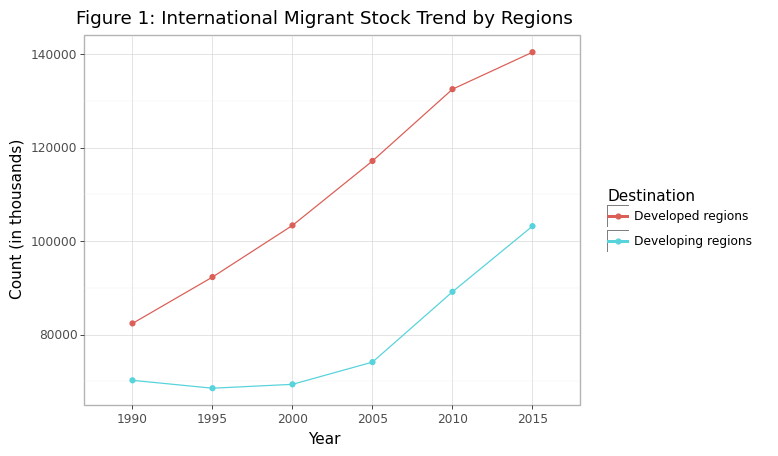

<ggplot: (8762517728711)>

In [57]:
(
    ggplot(tidy2_region)
    + geom_line(aes(x='Year', y='International migrant stock at mid-year', color='Destination', group='Destination'), stat='identity')
    + geom_point(aes(x='Year', y='International migrant stock at mid-year', color='Destination', group='Destination'), stat='identity')
    + theme_light()
    + labs(y='Count (in thousands)', x='Year', title='Figure 1: International Migrant Stock Trend by Regions')
)

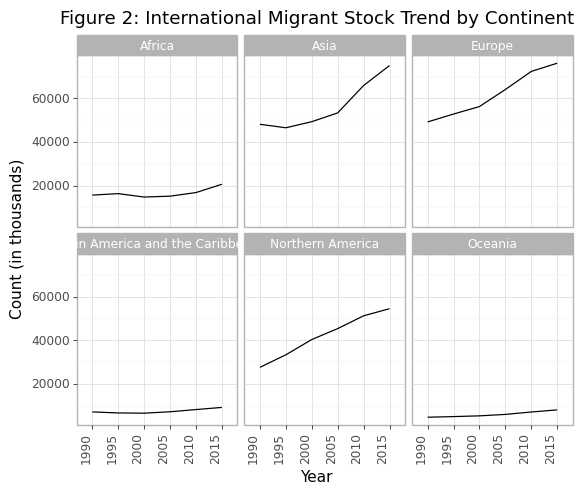

<ggplot: (8762517866493)>

In [58]:
(
    ggplot(tidy2_continent, aes(x='Year', y='International migrant stock at mid-year'))
    + ggtitle('Figure 2: International Migrant Stock Trend by Continent')
    + geom_line(group='Destination')
    + facet_wrap('~Destination')
    + ylab("Count (in thousands)")
    + theme_light()
    + theme(axis_text_x=element_text(angle=90, hjust=1))
)

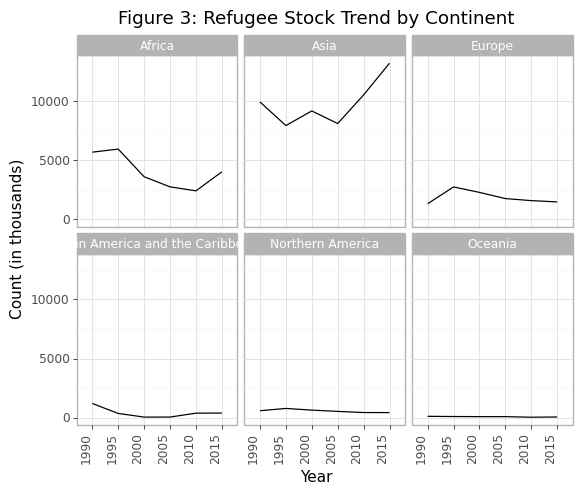

<ggplot: (8762507551994)>

In [59]:
(
    ggplot(tidy2_continent, aes(x='Year', y='Estimated refugee stock at mid-year'))
    + ggtitle('Figure 3: Refugee Stock Trend by Continent')
    + geom_line(group='Destination')
    + facet_wrap('~Destination')
    + ylab("Count (in thousands)")
    + theme_light()
    + theme(axis_text_x=element_text(angle=90, hjust=1))
)

In [60]:
G20_list = (32, 36, 76, 124, 156, 250, 276, 356, 360, 380, 392, 484, 410, 643, 682, 710, 724, 792, 826, 840)

In [61]:
tidy2_2015 = tidy2.loc[(tidy2['Year']==2015) & (tidy2['Country code'].isin(G20_list))].sort_values(ascending=False, by='International migrant stock at mid-year').reset_index(drop=True)
tidy2_2015

Country code                                        Destination  Year  \
0            840                           United States of America  2015   
1            276                                            Germany  2015   
2            643                                 Russian Federation  2015   
3            682                                       Saudi Arabia  2015   
4            826  United Kingdom of Great Britain and Northern I...  2015   
5            124                                             Canada  2015   
6            250                                             France  2015   
7             36                                          Australia  2015   
8            724                                              Spain  2015   
9            380                                              Italy  2015   
10           356                                              India  2015   
11           710                                       South Africa  2015   
12           792                                             Turkey  2015   
13            32                                          Argentina  2015   
14           392                                              Japan  2015   
15           410                                  Republic of Korea  2015   
16           484                                             Mexico  2015   
17           156                                              China  2015   
18            76                                             Brazil  2015   
19           360                                          Indonesia  2015   

    Estimated refugee stock at mid-year  \
0                               263.662   
1                               216.973   
2                               235.750   
3                                 0.538   
4                               126.055   
5                               160.279   
6                               252.264   
7                                48.005   
8                                 4.637   
9                                76.263   
10                              198.665   
11                              112.192   
12                             1587.374   
13                                4.278   
14                                2.560   
15                                0.874   
16                                1.831   
17                              301.052   
18                                7.490   
19                                4.270   

    International migrant stock at mid-year  Total population  
0                                 46627.102        321773.631  
1                                 12005.690         80688.545  
2                                 11643.276        143456.918  
3                                 10185.945         31540.372  
4                                  8543.120         64715.810  
5                                  7835.502         35939.927  
6                                  7784.418         64395.345  
7                                  6763.663         23968.973  
8                                  5852.953         46121.699  
9                                  5788.875         59797.685  
10                                 5240.960       1311050.527  
11                                 3142.511         54490.406  
12                                 2964.916         78665.830  
13                                 2086.302         43416.755  
14                                 2043.877        126573.481  
15                                 1327.324         50293.439  
16                                 1193.155        127017.224  
17                                  978.046       1376048.943  
18                                  713.568        207847.528  
19                                  328.846        257563.815

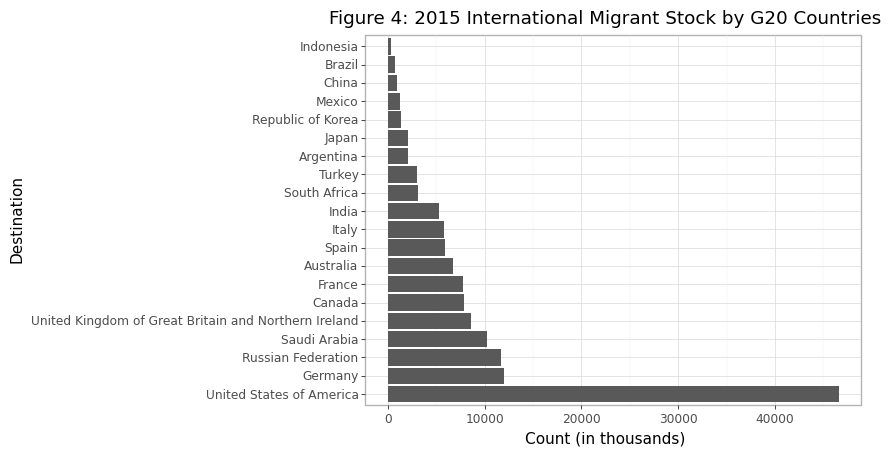

<ggplot: (8762500831422)>

In [96]:
G20_ordered_list = tidy2_2015['Destination'].value_counts(normalize=True).index.tolist()
tidy2_2015['Destination'] = pd.Categorical(tidy2_2015['Destination'], categories=G20_ordered_list, ordered=True)


(
    ggplot(tidy2_2015)
    + geom_bar(aes(x='Destination', y='International migrant stock at mid-year'), stat='identity')
    + scale_x_discrete(limits=G20_ordered_list)
    + coord_flip()
    + theme_light()
    + labs(y='Count (in thousands)', x='Destination', title='Figure 4: 2015 International Migrant Stock by G20 Countries')
)

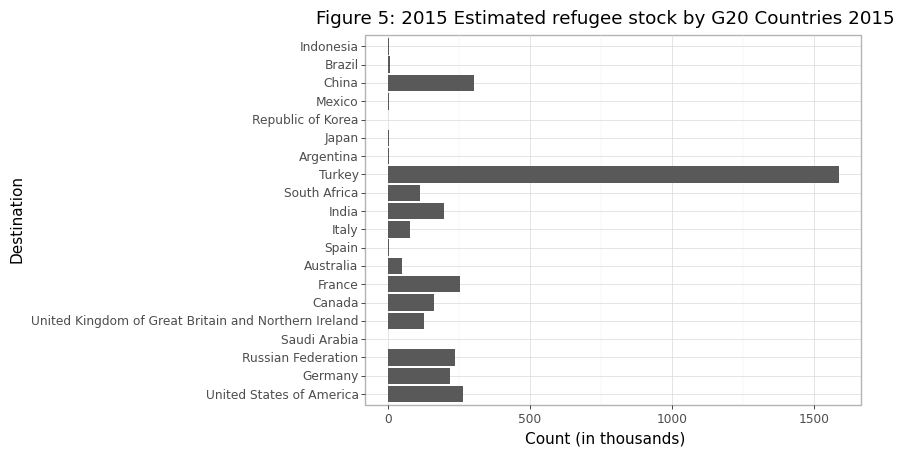

<ggplot: (8762505222638)>

In [97]:
(
    ggplot(tidy2_2015)
    + geom_bar(aes(x='Destination', y='Estimated refugee stock at mid-year'), stat='identity')
    + scale_x_discrete(limits=G20_ordered_list)
    + coord_flip()
    + theme_light()
    + labs(y='Count (in thousands)', x='Destination', title='Figure 5: 2015 Estimated refugee stock by G20 Countries 2015')
)

In [64]:
tidy2_1990 = tidy2.loc[(tidy2['Year']==1990) & (tidy2['Country code'].isin(G20_list))].reset_index(drop=True)
tidy2_1990

Country code                                        Destination  Year  \
0             32                                          Argentina  1990   
1             36                                          Australia  1990   
2             76                                             Brazil  1990   
3            124                                             Canada  1990   
4            156                                              China  1990   
5            250                                             France  1990   
6            276                                            Germany  1990   
7            356                                              India  1990   
8            360                                          Indonesia  1990   
9            380                                              Italy  1990   
10           392                                              Japan  1990   
11           410                                  Republic of Korea  1990   
12           484                                             Mexico  1990   
13           643                                 Russian Federation  1990   
14           682                                       Saudi Arabia  1990   
15           710                                       South Africa  1990   
16           724                                              Spain  1990   
17           792                                             Turkey  1990   
18           826  United Kingdom of Great Britain and Northern I...  1990   
19           840                           United States of America  1990   

    Estimated refugee stock at mid-year  \
0                                12.185   
1                                97.915   
2                                 5.333   
3                               145.257   
4                               285.788   
5                               186.629   
6                               722.250   
7                               111.146   
8                                 2.138   
9                                12.379   
10                                6.649   
11                                0.000   
12                              356.454   
13                                0.000   
14                               33.261   
15                               90.000   
16                                8.303   
17                               30.534   
18                               43.395   
19                              438.193   

    International migrant stock at mid-year  Total population  
0                                  1649.919         32729.740  
1                                  3955.213         17096.869  
2                                   798.517        150393.143  
3                                  4333.318         27662.440  
4                                   376.361       1154605.773  
5                                  5897.267         56943.299  
6                                  5936.181         78958.237  
7                                  7493.204        870601.776  
8                                   465.612        181436.821  
9                                  1428.219         57007.577  
10                                 1075.626        122249.285  
11                                   43.017         42972.254  
12                                  695.674         85609.404  
13                                11524.948        147568.552  
14                                 4998.445         16361.453  
15                                 1163.883         36793.490  
16                                  821.605         39192.055  
17                                 1163.686         53994.605  
18                                 3650.286         57110.117  
19                                23251.026        252847.810

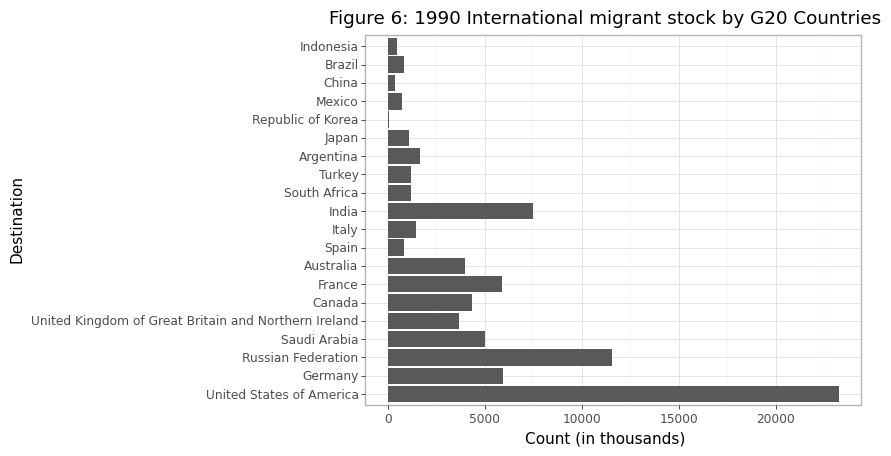

<ggplot: (8762500437468)>

In [98]:
(
    ggplot(tidy2_1990)
    + geom_bar(aes(x='Destination', y='International migrant stock at mid-year'), stat='identity')
    + scale_x_discrete(limits=G20_ordered_list)
    + coord_flip()
    + theme_light()
    + labs(y='Count (in thousands)', x='Destination', title='Figure 6: 1990 International migrant stock by G20 Countries')
)

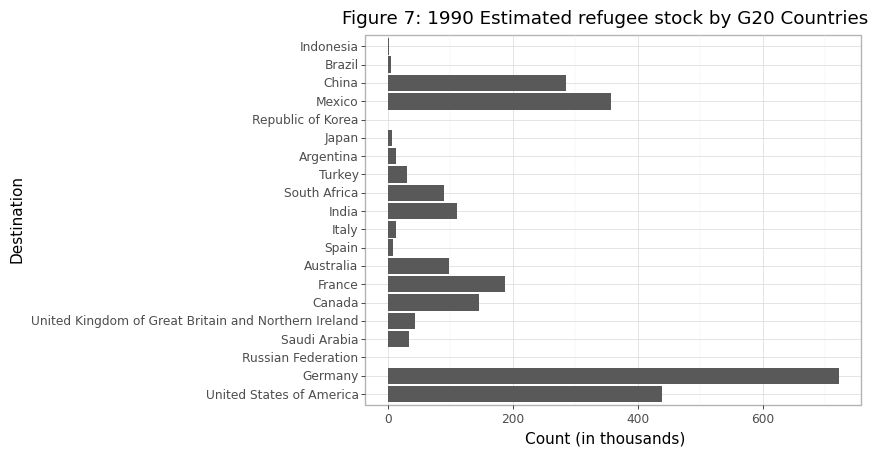

<ggplot: (8762500399348)>

In [99]:
(
    ggplot(tidy2_1990)
    + geom_bar(aes(x='Destination', y='Estimated refugee stock at mid-year'), stat='identity')
    + scale_x_discrete(limits=G20_ordered_list)
    + coord_flip()
    + theme_light()
    + labs(y='Count (in thousands)', x='Destination', title='Figure 7: 1990 Estimated refugee stock by G20 Countries')
)

In [67]:
canada = tidy2.loc[(tidy2['Country code']==124)].reset_index(drop=True)
canada

Country code Destination  Year  Estimated refugee stock at mid-year  \
0           124      Canada  1990                              145.257   
1           124      Canada  1995                              152.125   
2           124      Canada  2000                              125.154   
3           124      Canada  2005                              147.171   
4           124      Canada  2010                              165.549   
5           124      Canada  2015                              160.279   

   International migrant stock at mid-year  Total population  
0                                 4333.318         27662.440  
1                                 4864.778         29299.478  
2                                 5511.914         30701.903  
3                                 6078.985         32256.333  
4                                 7011.226         34126.173  
5                                 7835.502         35939.927

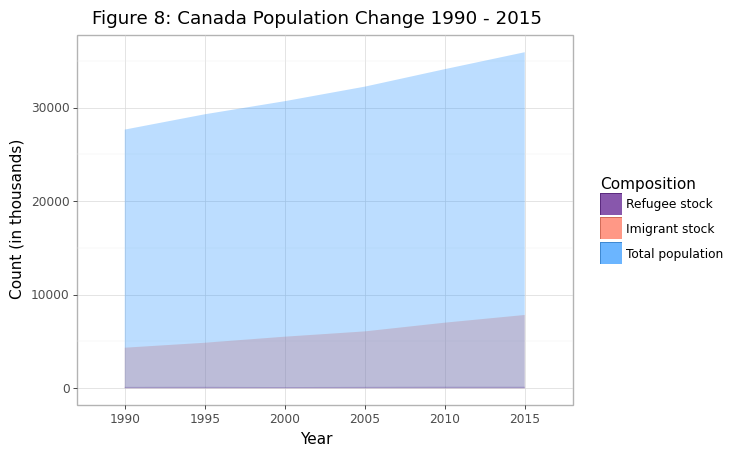

<ggplot: (8762507291353)>

In [68]:
(
    ggplot(canada)
    + geom_area(aes(x='Year', y='Estimated refugee stock at mid-year', group='Destination', fill="'indigo'"), stat='identity', alpha=0.3)
    + geom_area(aes(x='Year', y='International migrant stock at mid-year', group='Destination', fill="'tomato'"), stat='identity', alpha=0.3)
    + geom_area(aes(x='Year', y='Total population', group='Destination', fill="'dodgerblue'"), stat='identity', alpha=0.3)
    + theme_light()
    + labs(y='Count (in thousands)', x='Year', title='Figure 8: Canada Population Change 1990 - 2015')
    + scale_fill_identity(guide='legend',name='Composition', breaks=['indigo', 'tomato','dodgerblue'], labels=['Refugee stock', 'Imigrant stock','Total population'])
)

In [69]:
germany = tidy2.loc[(tidy2['Country code']==276)].reset_index(drop=True)
germany

Country code Destination  Year  Estimated refugee stock at mid-year  \
0           276     Germany  1990                              722.250   
1           276     Germany  1995                             1267.900   
2           276     Germany  2000                              906.000   
3           276     Germany  2005                              700.016   
4           276     Germany  2010                              594.269   
5           276     Germany  2015                              216.973   

   International migrant stock at mid-year  Total population  
0                                 5936.181         78958.237  
1                                 7464.406         81612.900  
2                                 8992.631         81895.925  
3                                10299.160         81246.801  
4                                11605.690         80435.307  
5                                12005.690         80688.545

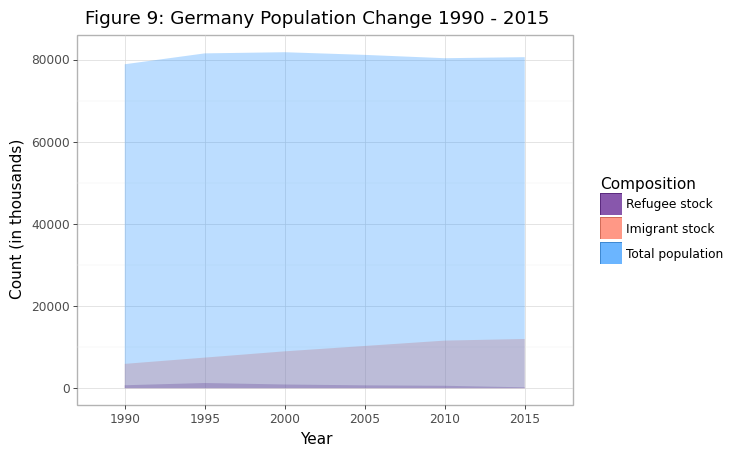

<ggplot: (8762507556741)>

In [70]:
(
    ggplot(germany)
    + geom_area(aes(x='Year', y='Estimated refugee stock at mid-year', group='Destination', fill="'indigo'"), stat='identity', alpha=0.3)
    + geom_area(aes(x='Year', y='International migrant stock at mid-year', group='Destination', fill="'tomato'"), stat='identity', alpha=0.3)
    + geom_area(aes(x='Year', y='Total population', group='Destination', fill="'dodgerblue'"), stat='identity', alpha=0.3)
    + theme_light()
    + labs(y='Count (in thousands)', x='Year', title='Figure 9: Germany Population Change 1990 - 2015')
    + scale_fill_identity(guide='legend',name='Composition', breaks=['indigo', 'tomato','dodgerblue'], labels=['Refugee stock', 'Imigrant stock','Total population'])
)

In [71]:
sa = tidy2.loc[(tidy2['Country code']==682)].reset_index(drop=True)
sa

Country code   Destination  Year  Estimated refugee stock at mid-year  \
0           682  Saudi Arabia  1990                               33.261   
1           682  Saudi Arabia  1995                               13.169   
2           682  Saudi Arabia  2000                                5.309   
3           682  Saudi Arabia  2005                              240.701   
4           682  Saudi Arabia  2010                                0.555   
5           682  Saudi Arabia  2015                                0.538   

   International migrant stock at mid-year  Total population  
0                                 4998.445         16361.453  
1                                 5122.702         18853.670  
2                                 5263.387         21392.273  
3                                 6501.819         24745.230  
4                                 8429.956         28090.647  
5                                10185.945         31540.372

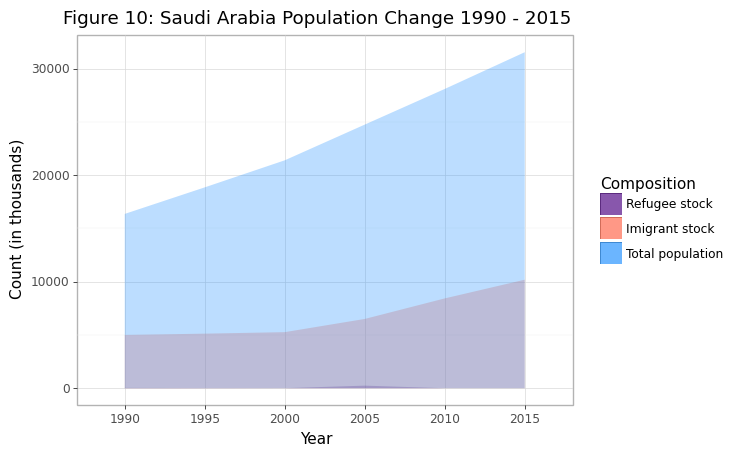

<ggplot: (8762507547206)>

In [72]:
(
    ggplot(sa)
    + geom_area(aes(x='Year', y='Estimated refugee stock at mid-year', group='Destination', fill="'indigo'"), stat='identity', alpha=0.3)
    + geom_area(aes(x='Year', y='International migrant stock at mid-year', group='Destination', fill="'tomato'"), stat='identity', alpha=0.3)
    + geom_area(aes(x='Year', y='Total population', group='Destination', fill="'dodgerblue'"), stat='identity', alpha=0.3)
    + theme_light()
    + labs(y='Count (in thousands)', x='Year', title='Figure 10: Saudi Arabia Population Change 1990 - 2015')
    + scale_fill_identity(guide='legend',name='Composition', breaks=['indigo', 'tomato','dodgerblue'], labels=['Refugee stock', 'Imigrant stock','Total population'])
)

In [73]:
tidy2_G20 = tidy2.loc[(tidy2['Country code'].isin(G20_list))].reset_index(drop=True)
tidy2_G20

Country code               Destination  Year  \
0              32                 Argentina  1990   
1              32                 Argentina  1995   
2              32                 Argentina  2000   
3              32                 Argentina  2005   
4              32                 Argentina  2010   
..            ...                       ...   ...   
115           840  United States of America  1995   
116           840  United States of America  2000   
117           840  United States of America  2005   
118           840  United States of America  2010   
119           840  United States of America  2015   

     Estimated refugee stock at mid-year  \
0                                 12.185   
1                                  7.278   
2                                  2.371   
3                                  2.824   
4                                  4.223   
..                                   ...   
115                              623.294   
116                              508.222   
117                              379.340   
118                              264.574   
119                              263.662   

     International migrant stock at mid-year  Total population  
0                                   1649.919         32729.740  
1                                   1595.069         34994.818  
2                                   1540.219         37057.453  
3                                   1673.088         39145.491  
4                                   1805.957         41222.875  
..                                       ...               ...  
115                                28451.053        266275.528  
116                                34814.053        282895.741  
117                                39258.293        296139.635  
118                                44183.643        309876.170  
119                                46627.102        321773.631  

[120 rows x 6 columns]

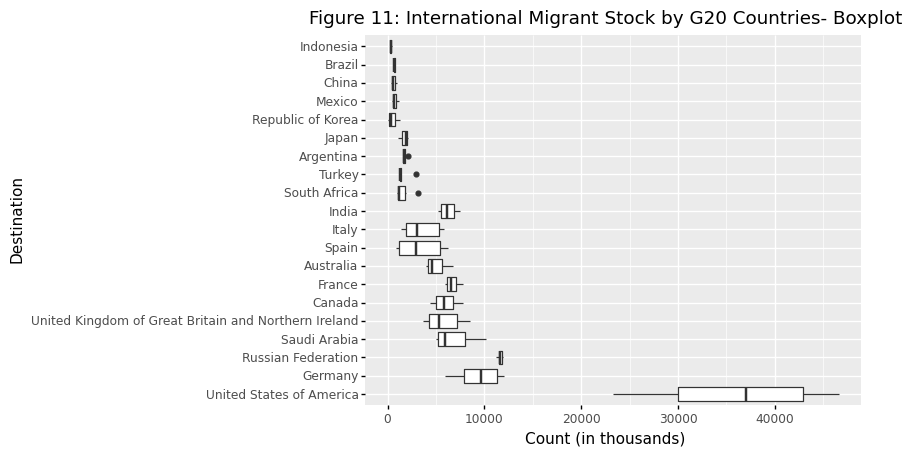

<ggplot: (8762500437465)>

In [100]:
(
    ggplot(tidy2_G20, aes(x='Destination', y='International migrant stock at mid-year'))
    + geom_boxplot()
    + scale_x_discrete(limits=G20_ordered_list)
    + coord_flip()
    + labs(y='Count (in thousands)', x='Destination', title='Figure 11: International Migrant Stock by G20 Countries- Boxplot')
)

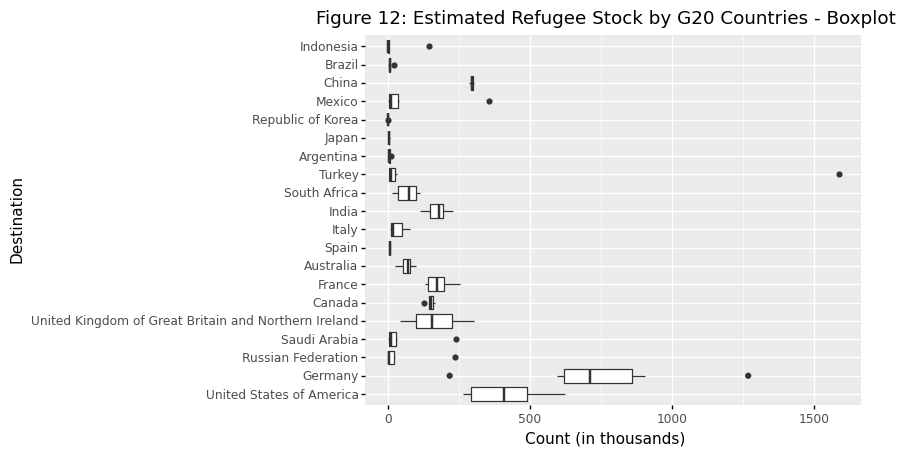

<ggplot: (8762507150135)>

In [101]:
(
    ggplot(tidy2_G20, aes(x='Destination', y='Estimated refugee stock at mid-year'))
    + geom_boxplot()
    + scale_x_discrete(limits=G20_ordered_list)
    + coord_flip()
    + labs(y='Count (in thousands)', x='Destination', title='Figure 12: Estimated Refugee Stock by G20 Countries - Boxplot')
)

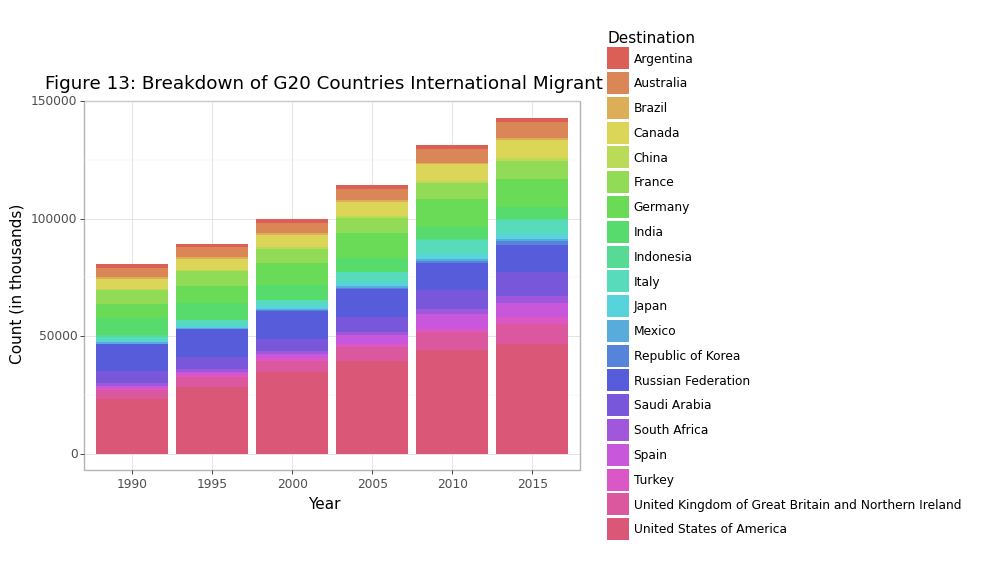

<ggplot: (8762505319087)>

In [76]:
(
    ggplot(tidy2_G20)
    + geom_bar(aes(x='Year', y='International migrant stock at mid-year', fill='Destination'), stat='identity', position='stack')
    + theme_light()
    + labs(y='Count (in thousands)', x='Year', title='Figure 13: Breakdown of G20 Countries International Migrant')
)

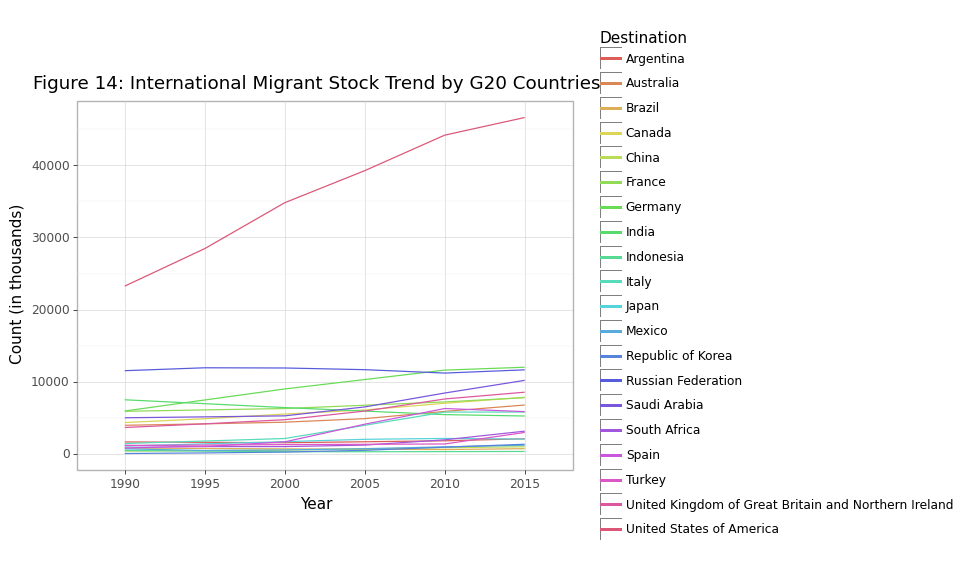

<ggplot: (8762505281967)>

In [77]:
(
    ggplot(tidy2_G20)
    + geom_line(aes(x='Year', y='International migrant stock at mid-year', color='Destination', group='Destination'), stat='identity')
    + theme_light()
    + labs(y='Count (in thousands)', x='Year', title='Figure 14: International Migrant Stock Trend by G20 Countries')
)

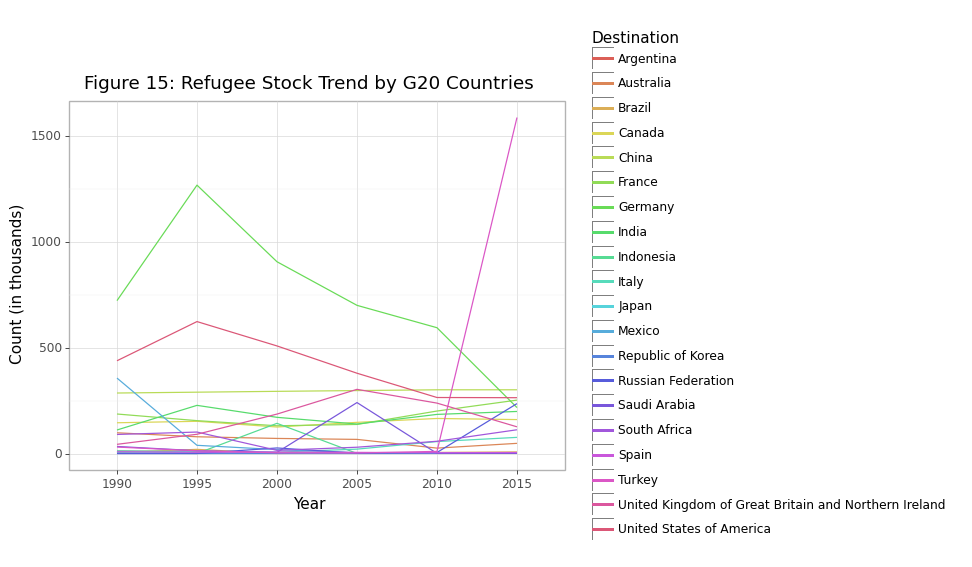

<ggplot: (8762505196273)>

In [78]:
(
    ggplot(tidy2_G20)
    + geom_line(aes(x='Year', y='Estimated refugee stock at mid-year', color='Destination', group='Destination'), stat='identity')
    + theme_light()
    + labs(y='Count (in thousands)', x='Year', title='Figure 15: Refugee Stock Trend by G20 Countries')
)

In [79]:
tidy1_2015 = tidy1.loc[(tidy1['Year']==2015) & (tidy1['Country code'].isin(G20_list))]
tidy1_2015

Country code                                        Destination  Gender  \
101             32                                          Argentina  Female   
107             32                                          Argentina    Male   
113             36                                          Australia  Female   
119             36                                          Australia    Male   
269             76                                             Brazil  Female   
...            ...                                                ...     ...   
2531           792                                             Turkey    Male   
2621           826  United Kingdom of Great Britain and Northern I...  Female   
2627           826  United Kingdom of Great Britain and Northern I...    Male   
2669           840                           United States of America  Female   
2675           840                           United States of America    Male   

      Year  International migrant stock at mid-year  Total population  
101   2015                                 1125.992         22172.053  
107   2015                                  960.310         21244.702  
113   2015                                 3426.083         11993.038  
119   2015                                 3337.580         11975.935  
269   2015                                  328.367        105646.790  
...    ...                                      ...               ...  
2531  2015                                 1514.468         38674.562  
2621  2015                                 4482.928         32817.216  
2627  2015                                 4060.192         31898.594  
2669  2015                                23802.795        162279.859  
2675  2015                                22824.307        159493.772  

[40 rows x 6 columns]

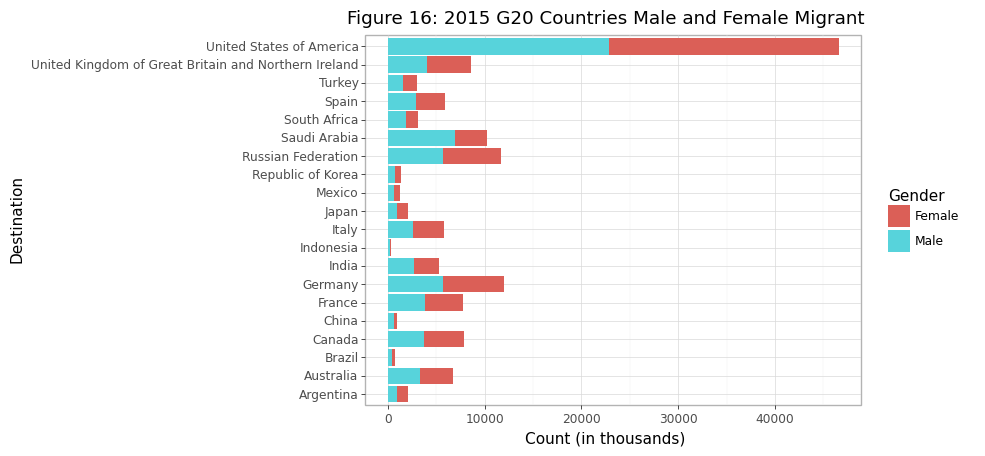

<ggplot: (8762505127458)>

In [80]:
(
    ggplot(tidy1_2015)
    + geom_bar(aes(x='Destination', y='International migrant stock at mid-year', fill='Gender'), stat='identity', position='stack')
    + coord_flip()
    + theme_light()
    + labs(y='Count (in thousands)', x='Destination', title='Figure 16: 2015 G20 Countries Male and Female Migrant')
)

In [81]:
tidy3_G20 = tidy3.loc[(tidy3['Country code'].isin(G20_list))].reset_index(drop=True)
tidy3_G20

Country code               Destination  Gender  Year  \
0              32                 Argentina  Female  1990   
1              32                 Argentina  Female  1995   
2              32                 Argentina  Female  2000   
3              32                 Argentina  Female  2005   
4              32                 Argentina  Female  2010   
..            ...                       ...     ...   ...   
235           840  United States of America    Male  1995   
236           840  United States of America    Male  2000   
237           840  United States of America    Male  2005   
238           840  United States of America    Male  2010   
239           840  United States of America    Male  2015   

     International migrant stock as a percentage of total population  
0                                             5.165815                
1                                             4.716829                
2                                             4.344760                
3                                             4.492158                
4                                             4.626209                
..                                                 ...                
235                                          10.714671                
236                                          12.403905                
237                                          13.400389                
238                                          14.152215                
239                                          14.310469                

[240 rows x 5 columns]

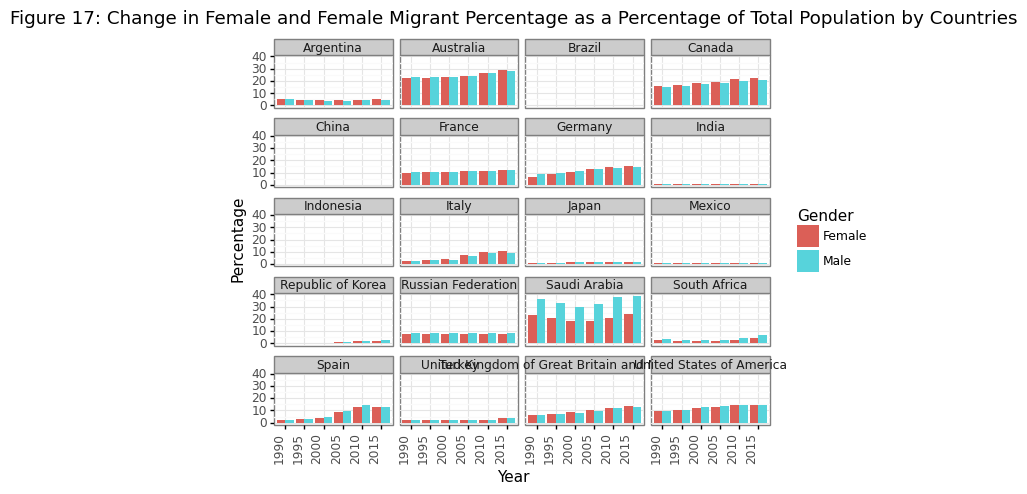

<ggplot: (8762517873595)>

In [82]:
(
    ggplot(tidy3_G20)
    + ggtitle('Figure 17: Change in Female and Female Migrant Percentage as a Percentage of Total Population by Countries')
    + geom_col(aes(x='Year', y='International migrant stock as a percentage of total population', fill='Gender'), stat='identity', position='dodge')
    + facet_wrap('~Destination', ncol=4)
    + ylab("Percentage")
    + theme_bw()
    + theme(axis_text_x=element_text(angle=90, hjust=1))
)

In [83]:
tidy4_G20 = tidy4.loc[(tidy4['Country code'].isin(G20_list))].reset_index(drop=True)
tidy4_G20

Country code               Destination  Year  \
0              32                 Argentina  1990   
1              32                 Argentina  1995   
2              32                 Argentina  2000   
3              32                 Argentina  2005   
4              32                 Argentina  2010   
..            ...                       ...   ...   
115           840  United States of America  1995   
116           840  United States of America  2000   
117           840  United States of America  2005   
118           840  United States of America  2010   
119           840  United States of America  2015   

     Female migrants as a percentage of the international migrant stock  \
0                                            52.232200                    
1                                            52.790318                    
2                                            53.388187                    
3                                            53.689824                    
4                                            53.947076                    
..                                                 ...                    
115                                          50.679650                    
116                                          50.276444                    
117                                          50.036345                    
118                                          50.899999                    
119                                          51.049270                    

     Refugees as a percentage of the international migrant stock  \
0                                             0.738521             
1                                             0.456281             
2                                             0.153939             
3                                             0.168790             
4                                             0.233837             
..                                                 ...             
115                                           2.190759             
116                                           1.459819             
117                                           0.966267             
118                                           0.598805             
119                                           0.565469             

     International migrant stock as a percentage of total population  
0                                             5.041039                
1                                             4.558015                
2                                             4.156300                
3                                             4.274025                
4                                             4.380958                
..                                                 ...                
115                                          10.684817                
116                                          12.306319                
117                                          13.256683                
118                                          14.258484                
119                                          14.490654                

[120 rows x 6 columns]

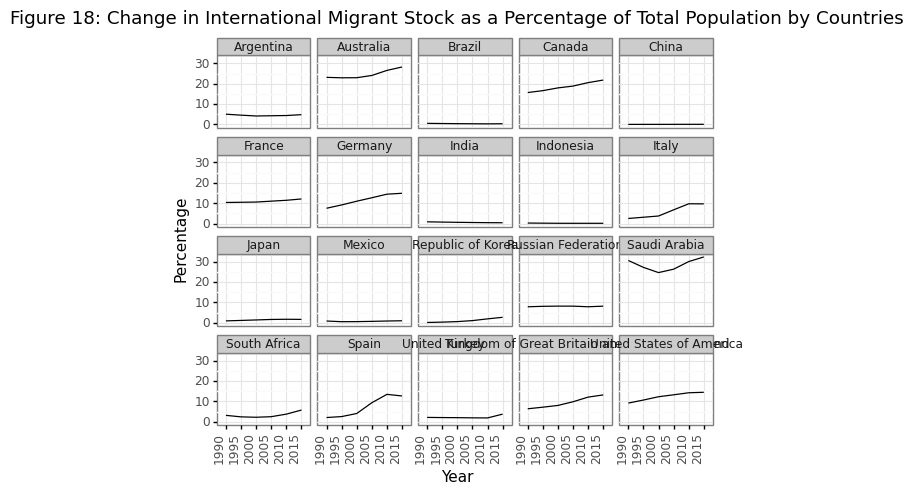

<ggplot: (8762500814839)>

In [84]:
(
    ggplot(tidy4_G20, aes(x='Year', y='International migrant stock as a percentage of total population'))
    + ggtitle('Figure 18: Change in International Migrant Stock as a Percentage of Total Population by Countries')
    + geom_line(group='Destination')
    + facet_wrap('~Destination')
    + ylab("Percentage")
    + theme_bw()
    + theme(axis_text_x=element_text(angle=90, hjust=1))
)

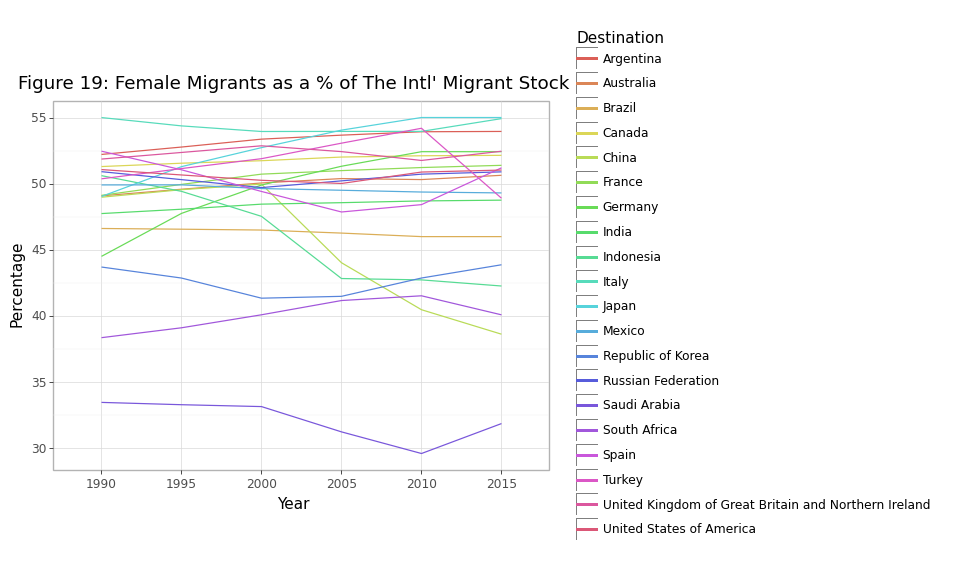

<ggplot: (8762507085957)>

In [85]:
(
    ggplot(tidy4_G20)
    + geom_line(aes(x='Year', y='Female migrants as a percentage of the international migrant stock', color='Destination', group='Destination'), stat='identity')
    + theme_light()
    + labs(y='Percentage', x='Year', title="Figure 19: Female Migrants as a % of The Intl' Migrant Stock")
)

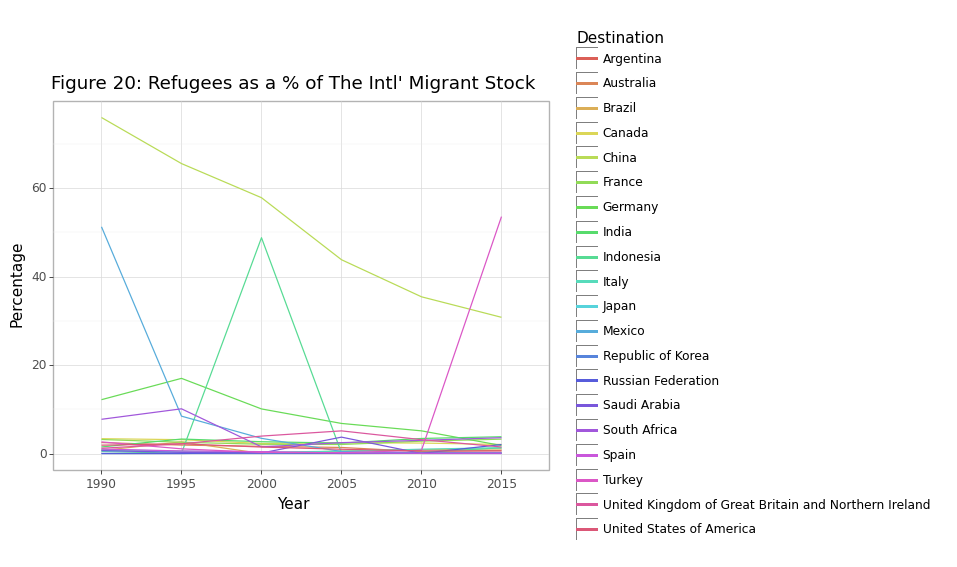

<ggplot: (8762505310847)>

In [86]:
(
    ggplot(tidy4_G20)
    + geom_line(aes(x='Year', y='Refugees as a percentage of the international migrant stock', color='Destination', group='Destination'), stat='identity')
    + theme_light()
    + labs(y='Percentage', x='Year', title="Figure 20: Refugees as a % of The Intl' Migrant Stock")
)

In [87]:
tidy5_G20 = tidy5.loc[(tidy5['Country code'].isin(G20_list))].reset_index(drop=True)
tidy5_G20

Country code               Destination  Gender       Year  \
0              32                 Argentina  Female  1990-1995   
1              32                 Argentina  Female  1995-2000   
2              32                 Argentina  Female  2000-2005   
3              32                 Argentina  Female  2005-2010   
4              32                 Argentina  Female  2010-2015   
..            ...                       ...     ...        ...   
195           840  United States of America    Male  1990-1995   
196           840  United States of America    Male  1995-2000   
197           840  United States of America    Male  2000-2005   
198           840  United States of America    Male  2005-2010   
199           840  United States of America    Male  2010-2015   

     Annual rate of change of the migrant stock  
0                                     -0.463611  
1                                     -0.474614  
2                                      1.767608  
3                                      1.623993  
4                                      2.894809  
..                                          ...  
195                                    4.202219  
196                                    4.199559  
197                                    2.499173  
198                                    2.015103  
199                                    1.015651  

[200 rows x 5 columns]

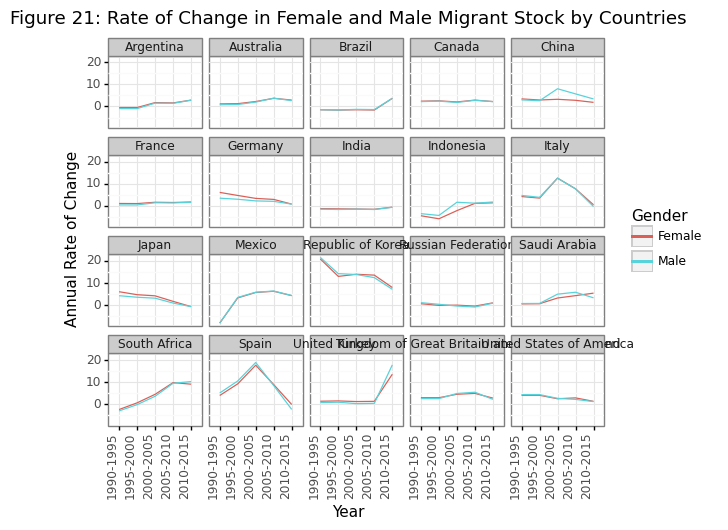

<ggplot: (8762500701169)>

In [88]:
(
    ggplot(tidy5_G20)
    + ggtitle('Figure 21: Rate of Change in Female and Male Migrant Stock by Countries')
    + geom_line(aes(x='Year', y='Annual rate of change of the migrant stock', color='Gender', group='Gender'), stat='identity')
    + facet_wrap('~Destination')
    + ylab("Annual Rate of Change")
    + theme_bw()
    + theme(axis_text_x=element_text(angle=90, hjust=1))
)

In [89]:
tidy6_G20 = tidy6.melt(id_vars=['Country code', 'Destination', 'Year'],
                      var_name='Variable',
                      value_name='Annual rate of change')
tidy6_G20 = tidy6_G20.loc[(tidy6_G20['Country code'].isin(G20_list))].reset_index(drop=True)
tidy6_G20

Country code               Destination       Year  \
0              32                 Argentina  1990-1995   
1              32                 Argentina  1995-2000   
2              32                 Argentina  2000-2005   
3              32                 Argentina  2005-2010   
4              32                 Argentina  2010-2015   
..            ...                       ...        ...   
195           840  United States of America  1990-1995   
196           840  United States of America  1995-2000   
197           840  United States of America  2000-2005   
198           840  United States of America  2005-2010   
199           840  United States of America  2010-2015   

                                       Variable  Annual rate of change  
0    Annual rate of change of the migrant stock              -0.676184  
1    Annual rate of change of the migrant stock              -0.699848  
2    Annual rate of change of the migrant stock               1.654928  
3    Annual rate of change of the migrant stock               1.528392  
4    Annual rate of change of the migrant stock               2.886050  
..                                          ...                    ...  
195  Annual rate of change of the refugee stock               3.010459  
196  Annual rate of change of the refugee stock              -8.118718  
197  Annual rate of change of the refugee stock              -8.252541  
198  Annual rate of change of the refugee stock              -9.570077  
199  Annual rate of change of the refugee stock              -1.145606  

[200 rows x 5 columns]

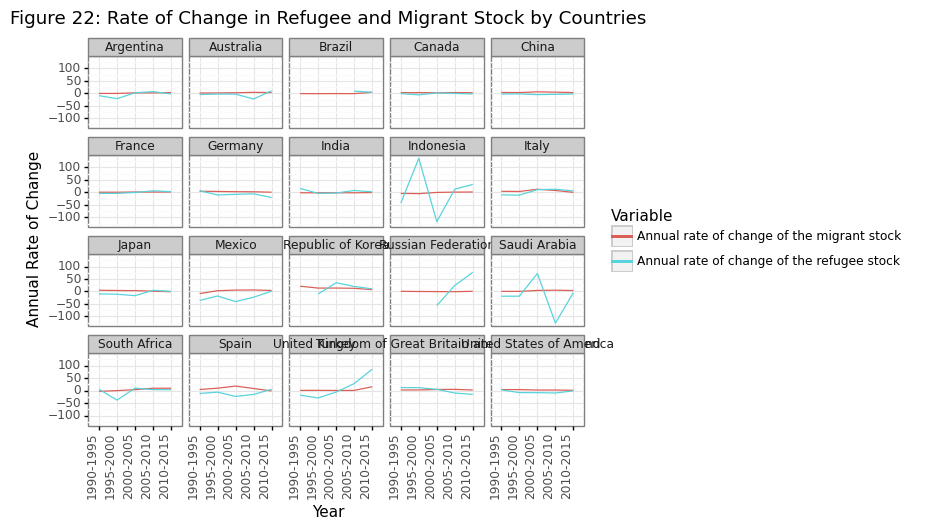

<ggplot: (8762517726928)>

In [90]:
(
    ggplot(tidy6_G20)
    + ggtitle('Figure 22: Rate of Change in Refugee and Migrant Stock by Countries')
    + geom_line(aes(x='Year', y='Annual rate of change', color='Variable', group='Variable'), stat='identity')
    + facet_wrap('~Destination')
    + ylab("Annual Rate of Change")
    + theme_bw()
    + theme(axis_text_x=element_text(angle=90, hjust=1))
)

## End :)